## **Parte 1**

#### **RF1 - Listagem de todos os times da NBA agrupados por Conferência**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

eastern_teams = pd.read_csv('../data/processed/eastern_conference_teams.csv')
western_teams = pd.read_csv('../data/processed/western_conference_teams.csv')

print("Times da Conferência Leste:")
display(eastern_teams.head())

print("Times da Conferência Oeste:")
display(western_teams.head())

Times da Conferência Leste:


,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
4,1610612748,Miami Heat,MIA,Heat,Miami,Florida,1988


Times da Conferência Oeste:


,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
1,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
2,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
3,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
4,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967


#### **RF2 - Apresentação da classificação atual dos times [Agrupados por Conferência]**

In [31]:
import os

def load_games_data(data_dir='../data/raw'):
    games_data = []
    for filename in os.listdir(data_dir):
        if filename.endswith('_games.csv'):
            team_name = filename.replace('_games.csv', '').replace('_', ' ')
            team_data = pd.read_csv(os.path.join(data_dir, filename))
            team_data['team_name'] = team_name
            games_data.append(team_data)
    return pd.concat(games_data, ignore_index=True)

games_data = load_games_data()
print("Dados dos jogos carregados:")
display(games_data.head())

def calculate_standings(games_data):
    standings = games_data.groupby('team_name').agg(
        wins=pd.NamedAgg(column='WL', aggfunc=lambda x: (x == 'W').sum()),
        losses=pd.NamedAgg(column='WL', aggfunc=lambda x: (x == 'L').sum())
    ).reset_index()
    standings['win_percentage'] = standings['wins'] / (standings['wins'] + standings['losses'])
    standings = standings.sort_values(by='win_percentage', ascending=False).reset_index(drop=True)
    return standings


standings = calculate_standings(games_data)
print("Classificação dos times:")
display(standings.head())

team_conferences = {
    'Atlanta Hawks': 'East', 'Boston Celtics': 'East', 'Cleveland Cavaliers': 'East', 
    'New Orleans Pelicans': 'West', 'Chicago Bulls': 'East', 'Dallas Mavericks': 'West', 
    'Denver Nuggets': 'West', 'Golden State Warriors': 'West', 'Houston Rockets': 'West', 
    'Los Angeles Clippers': 'West', 'Los Angeles Lakers': 'West', 'Miami Heat': 'East', 
    'Milwaukee Bucks': 'East', 'Minnesota Timberwolves': 'West', 'Brooklyn Nets': 'East', 
    'New York Knicks': 'East', 'Orlando Magic': 'East', 'Indiana Pacers': 'East', 
    'Philadelphia 76ers': 'East', 'Phoenix Suns': 'West', 'Portland Trail Blazers': 'West', 
    'Sacramento Kings': 'West', 'San Antonio Spurs': 'West', 'Oklahoma City Thunder': 'West', 
    'Toronto Raptors': 'East', 'Utah Jazz': 'West', 'Memphis Grizzlies': 'West', 
    'Washington Wizards': 'East', 'Detroit Pistons': 'East', 'Charlotte Hornets': 'East'
}

standings['conference'] = standings['team_name'].map(team_conferences)

eastern_standings = standings[standings['conference'] == 'East']
western_standings = standings[standings['conference'] == 'West']

print("Classificação da Conferência Leste:")
display(eastern_standings)

print("\nClassificação da Conferência Oeste:")
display(western_standings)

Dados dos jogos carregados:


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,team_name
0,22024,1610612737,ATL,Atlanta Hawks,22400612,2025-01-22,ATL vs. DET,L,241,104,...,15.0,32.0,47.0,25,14.0,3,13,14,-10.0,Atlanta Hawks
1,22024,1610612737,ATL,Atlanta Hawks,22400602,2025-01-20,ATL @ NYK,L,239,110,...,16.0,25.0,41.0,23,10.0,6,23,21,-9.0,Atlanta Hawks
2,22024,1610612737,ATL,Atlanta Hawks,22400587,2025-01-18,ATL @ BOS,W,265,119,...,13.0,42.0,55.0,27,9.0,10,17,17,4.0,Atlanta Hawks
3,22024,1610612737,ATL,Atlanta Hawks,22400563,2025-01-15,ATL @ CHI,W,240,110,...,14.0,37.0,51.0,28,11.0,5,9,15,16.0,Atlanta Hawks
4,22024,1610612737,ATL,Atlanta Hawks,22400556,2025-01-14,ATL vs. PHX,W,241,122,...,20.0,34.0,54.0,22,10.0,3,12,21,5.0,Atlanta Hawks


Classificação dos times:


,team_name,wins,losses,win_percentage
0,Los Angeles Lakers,2358,1657,0.587298
1,San Antonio Spurs,2298,1615,0.587273
2,Boston Celtics,2255,1709,0.568870
3,Utah Jazz,2175,1672,0.565376
4,Houston Rockets,2101,1714,0.550721


Classificação da Conferência Leste:


,team_name,wins,losses,win_percentage,conference
2,Boston Celtics,2255,1709,0.568870,East
8,Miami Heat,1832,1637,0.528106,East
9,Chicago Bulls,2014,1808,0.526949,East
11,Indiana Pacers,1930,1853,0.510177,East
12,Detroit Pistons,1931,1878,0.506957,East
14,Cleveland Cavaliers,1880,1888,0.498938,East
15,Milwaukee Bucks,1853,1902,0.493475,East
16,Atlanta Hawks,1840,1906,0.491191,East
18,Toronto Raptors,1286,1394,0.479851,East
19,New York Knicks,1795,1957,0.478412,East



Classificação da Conferência Oeste:


,team_name,wins,losses,win_percentage,conference
0,Los Angeles Lakers,2358,1657,0.587298,West
1,San Antonio Spurs,2298,1615,0.587273,West
3,Utah Jazz,2175,1672,0.565376,West
4,Houston Rockets,2101,1714,0.550721,West
5,Oklahoma City Thunder,2090,1716,0.549133,West
6,Phoenix Suns,2056,1747,0.540626,West
7,Portland Trail Blazers,2017,1769,0.532752,West
10,Dallas Mavericks,1970,1843,0.516654,West
13,Denver Nuggets,1882,1875,0.500932,West
17,Golden State Warriors,1843,1917,0.490160,West


#### **RF3 - Apresentar o total de vitórias e derrotas do time, separados por partidas jogadas em casa (mandante) e fora de casa (visitante),**

Resumo das Vitórias e Derrotas do Boston Celtics na Temporada 2023-2024:
Total de Vitórias: 33
Vitórias em Casa: 15
Vitórias Fora de Casa: 18
Total de Derrotas: 16
Derrotas em Casa: 11
Derrotas Fora de Casa: 5


C:\Users\jacks\AppData\Local\Temp\ipykernel_7036\2875494493.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jacks\AppData\Local\Temp\ipykernel_7036\2875494493.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



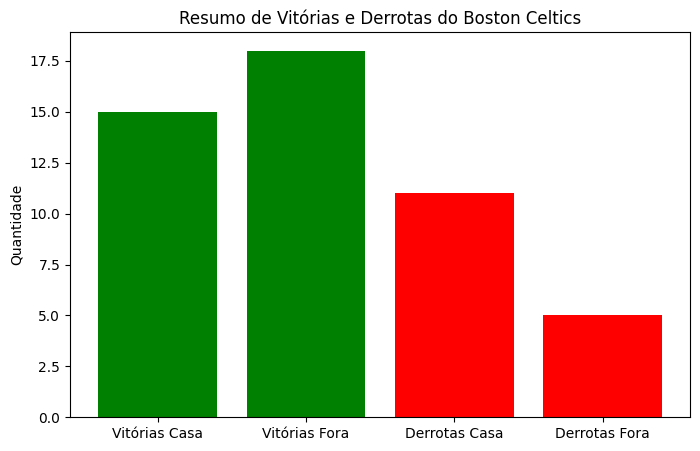

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def load_celtics_games(data_file='../data/raw/Boston_Celtics_games.csv'):
    return pd.read_csv(data_file)

celtics_games = load_celtics_games()

season_id = 22024 
celtics_games_2023_24 = celtics_games[celtics_games['SEASON_ID'] == season_id]

def calculate_team_home_away_results(team_games):
    team_games.loc[:, 'is_home'] = team_games['MATCHUP'].apply(lambda x: '@' not in x)
    team_games.loc[:, 'is_away'] = team_games['MATCHUP'].apply(lambda x: '@' in x)
    
    total_wins = (team_games['WL'] == 'W').sum()
    home_wins = ((team_games['WL'] == 'W') & (team_games['is_home'])).sum()
    away_wins = ((team_games['WL'] == 'W') & (team_games['is_away'])).sum()

    total_losses = (team_games['WL'] == 'L').sum()
    home_losses = ((team_games['WL'] == 'L') & (team_games['is_home'])).sum()
    away_losses = ((team_games['WL'] == 'L') & (team_games['is_away'])).sum()

    results = {
        'Total de Vitórias': total_wins,
        'Vitórias em Casa': home_wins,
        'Vitórias Fora de Casa': away_wins,
        'Total de Derrotas': total_losses,
        'Derrotas em Casa': home_losses,
        'Derrotas Fora de Casa': away_losses
    }

    return results

celtics_results = calculate_team_home_away_results(celtics_games_2023_24)

print("Resumo das Vitórias e Derrotas do Boston Celtics na Temporada 2023-2024:")
for key, value in celtics_results.items():
    print(f"{key}: {value}")

labels = ['Vitórias Casa', 'Vitórias Fora', 'Derrotas Casa', 'Derrotas Fora']
values = [
    celtics_results['Vitórias em Casa'],
    celtics_results['Vitórias Fora de Casa'],
    celtics_results['Derrotas em Casa'],
    celtics_results['Derrotas Fora de Casa']
]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'green', 'red', 'red'])
plt.title(f"Resumo de Vitórias e Derrotas do Boston Celtics")
plt.ylabel("Quantidade")
plt.show()



#### **RF4 - Total dos dados do Boston Celtics [temporada 23-24 e temporada atual], conforme Tabelas 3 e 4;**

Estatísticas do Boston Celtics - Temporada 2023-2024:
Pontos por Jogo: 115.43
Assistências por Jogo: 24.98
Rebotes por Jogo: 44.2
Cestas de 3 Pontos Convertidas: 840
Derrotas em Casa: 11
Derrotas Fora de Casa: 5


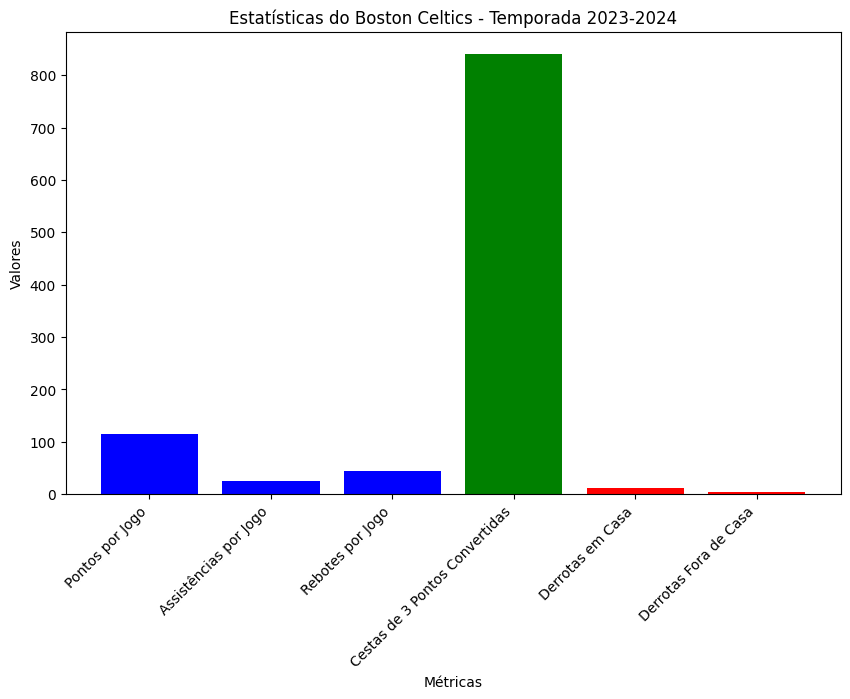

In [33]:
def calculate_team_stats_season(team_games):
    total_games = len(team_games)
    
    if total_games > 0:
        points_per_game = team_games['PTS'].sum() / total_games
        assists_per_game = team_games['AST'].sum() / total_games
        rebounds_per_game = team_games['REB'].sum() / total_games
    else:
        points_per_game = 0
        assists_per_game = 0
        rebounds_per_game = 0

    total_3_points_made = team_games['FG3M'].sum()
    home_losses = team_games[(team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("vs."))].shape[0]
    away_losses = team_games[(team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("@"))].shape[0]

    stats = {
        'Pontos por Jogo': round(points_per_game, 2),
        'Assistências por Jogo': round(assists_per_game, 2),
        'Rebotes por Jogo': round(rebounds_per_game, 2),
        'Cestas de 3 Pontos Convertidas': int(total_3_points_made),
        'Derrotas em Casa': home_losses,
        'Derrotas Fora de Casa': away_losses
    }
    
    return stats

season_id_2023_24 = 22024 
celtics_games_2023_24 = celtics_games[celtics_games['SEASON_ID'] == season_id_2023_24]

celtics_stats_2023_24 = calculate_team_stats_season(celtics_games_2023_24)

print("Estatísticas do Boston Celtics - Temporada 2023-2024:")
for key, value in celtics_stats_2023_24.items():
    print(f"{key}: {value}")

labels = list(celtics_stats_2023_24.keys())
values = list(celtics_stats_2023_24.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'blue', 'blue', 'green', 'red', 'red'])
plt.title("Estatísticas do Boston Celtics - Temporada 2023-2024")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.xticks(rotation=45, ha="right")
plt.show()


#### **RF5 - Divisão de alguns dados da Tabela 3, conforme Tabelas 4**

Divisão dos Dados do Boston Celtics - Temporada 2023-2024:
Total de Rebotes: 2166
Total de Rebotes Ofensivos: 557
Total de Rebotes Defensivos: 1609
Total de Pontos: 5656
Total de Cestas de 2 Pontos: 1166
Total de Cestas de 3 Pontos: 840
Total de Lances Livres: 804


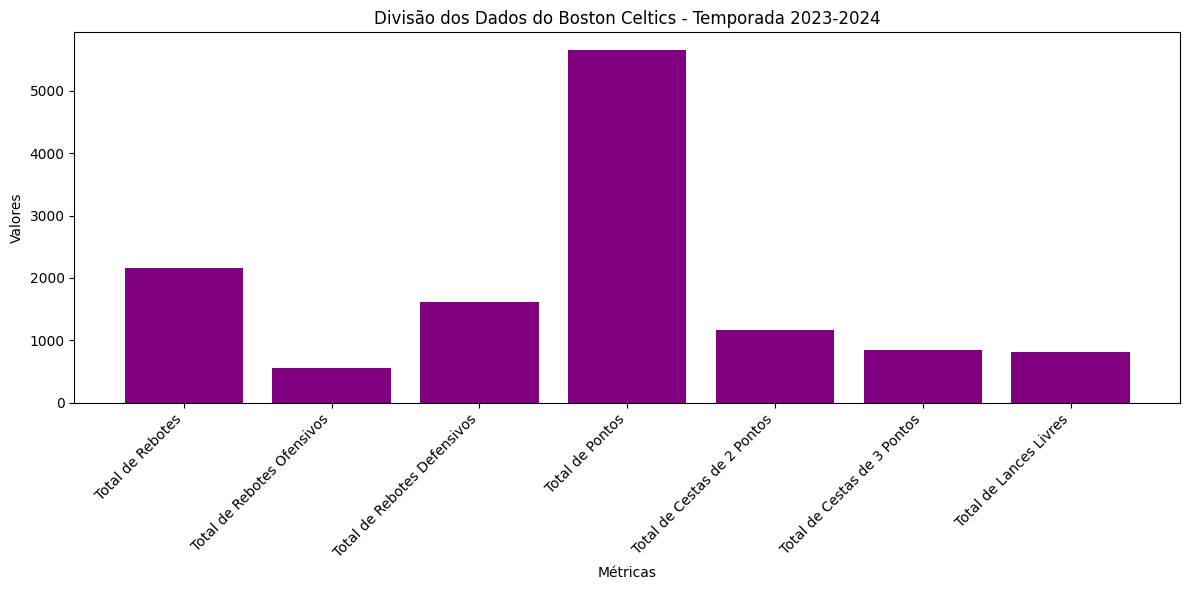

In [34]:
def calculate_detailed_stats(team_games):
    total_rebounds = team_games['REB'].sum()
    offensive_rebounds = team_games['OREB'].sum()
    defensive_rebounds = team_games['DREB'].sum()
    total_points = team_games['PTS'].sum()
    two_point_made = (team_games['FGM'] - team_games['FG3M']).sum()
    three_point_made = team_games['FG3M'].sum()
    free_throws_made = team_games['FTM'].sum()

    detailed_stats = {
        'Total de Rebotes': total_rebounds,
        'Total de Rebotes Ofensivos': offensive_rebounds,
        'Total de Rebotes Defensivos': defensive_rebounds,
        'Total de Pontos': total_points,
        'Total de Cestas de 2 Pontos': two_point_made,
        'Total de Cestas de 3 Pontos': three_point_made,
        'Total de Lances Livres': free_throws_made
    }
    
    return detailed_stats

season_id_2023_24 = 22024  
celtics_games_2023_24 = celtics_games[celtics_games['SEASON_ID'] == season_id_2023_24]

celtics_detailed_stats_2023_24 = calculate_detailed_stats(celtics_games_2023_24)

print("Divisão dos Dados do Boston Celtics - Temporada 2023-2024:")
for key, value in celtics_detailed_stats_2023_24.items():
    print(f"{key}: {value}")

labels = list(celtics_detailed_stats_2023_24.keys())
values = list(celtics_detailed_stats_2023_24.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='purple')
plt.title("Divisão dos Dados do Boston Celtics - Temporada 2023-2024")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### **RF6 - Apresentar os dados referentes a performance defensiva do time**

Dados Defensivos do Boston Celtics - Temporada 2023-2024:
Total de Roubos de Bola: 371
Total de Rebotes Defensivos: 1609
Total de Tocos por Jogo: 5.76
Total de Erros por Jogo: 11.73
Total de Faltas por Jogo: 16.55


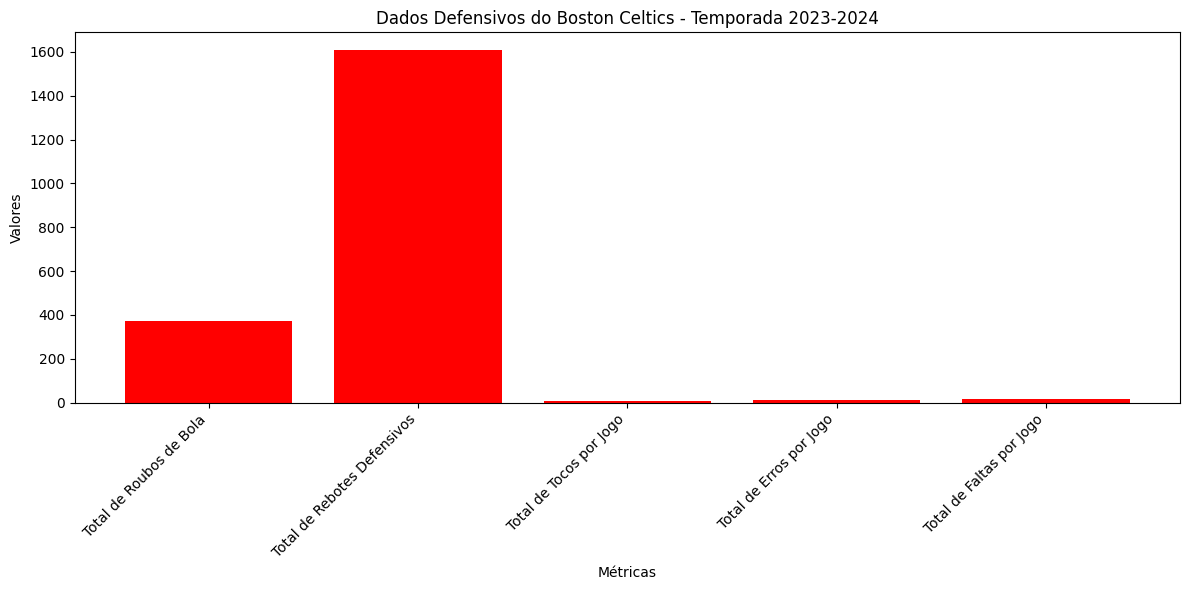

In [35]:
def calculate_defensive_stats(team_games):
    total_games = len(team_games)
    
    total_steals = team_games['STL'].sum()
    defensive_rebounds = team_games['DREB'].sum()
    blocks_per_game = team_games['BLK'].sum() / total_games if total_games > 0 else 0
    turnovers_per_game = team_games['TOV'].sum() / total_games if total_games > 0 else 0
    fouls_per_game = team_games['PF'].sum() / total_games if total_games > 0 else 0

    defensive_stats = {
        'Total de Roubos de Bola': total_steals,
        'Total de Rebotes Defensivos': defensive_rebounds,
        'Total de Tocos por Jogo': round(blocks_per_game, 2),
        'Total de Erros por Jogo': round(turnovers_per_game, 2),
        'Total de Faltas por Jogo': round(fouls_per_game, 2)
    }
    
    return defensive_stats

season_id_2023_24 = 22024 
celtics_games_2023_24 = celtics_games[celtics_games['SEASON_ID'] == season_id_2023_24]

celtics_defensive_stats_2023_24 = calculate_defensive_stats(celtics_games_2023_24)

print("Dados Defensivos do Boston Celtics - Temporada 2023-2024:")
for key, value in celtics_defensive_stats_2023_24.items():
    print(f"{key}: {value}")

labels = list(celtics_defensive_stats_2023_24.keys())
values = list(celtics_defensive_stats_2023_24.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='red')
plt.title("Dados Defensivos do Boston Celtics - Temporada 2023-2024")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### **RF7 - Jogos do Boston Celtics [temporada 23-24 e temporada atual], conforme Tabela 6.**

In [36]:
# Função para extrair o adversário do campo MATCHUP
def extract_opponent(matchup, team_name="Boston Celtics"):
    if "vs." in matchup:
        return matchup.replace(f"{team_name} vs. ", "")
    elif "@" in matchup:
        return matchup.replace(f"{team_name} @ ", "")
    else:
        return matchup

# Função para determinar se o jogo foi em casa ou fora
def home_or_away(matchup):
    if "vs." in matchup:
        return "Casa"
    elif "@" in matchup:
        return "Fora"
    else:
        return "Indefinido"

# Função para apresentar os jogos conforme Tabela 6
def present_games(team_games):
    games_info = team_games[['GAME_DATE', 'MATCHUP', 'WL', 'PTS']].copy()
    games_info['Adversário'] = games_info['MATCHUP'].apply(extract_opponent)
    games_info['Casa ou Fora'] = games_info['MATCHUP'].apply(home_or_away)
    games_info.rename(columns={'GAME_DATE': 'Data do Jogo', 'WL': 'Vitória ou Derrota', 'PTS': 'Placar'}, inplace=True)
    
    return games_info[['Data do Jogo', 'Adversário', 'Vitória ou Derrota', 'Casa ou Fora', 'Placar']]

# Temporada 2023-2024
season_id_2023_24 = 22024  # Valor correto para a temporada 2023-2024
celtics_games_2023_24 = celtics_games[celtics_games['SEASON_ID'] == season_id_2023_24]

# Apresentar os jogos para a temporada 2023-2024
games_info_2023_24 = present_games(celtics_games_2023_24)

# Exibir os resultados para a temporada 2023-2024
print("Jogos do Boston Celtics - Temporada 2023-2024:")
display(games_info_2023_24)


Jogos do Boston Celtics - Temporada 2023-2024:


,Data do Jogo,Adversário,Vitória ou Derrota,Casa ou Fora,Placar
0,2025-01-22,BOS @ LAC,W,Fora,117
1,2025-01-20,BOS @ GSW,W,Fora,125
2,2025-01-18,BOS vs. ATL,L,Casa,115
3,2025-01-17,BOS vs. ORL,W,Casa,121
4,2025-01-15,BOS @ TOR,L,Fora,97
5,2025-01-12,BOS vs. NOP,W,Casa,120
6,2025-01-10,BOS vs. SAC,L,Casa,97
7,2025-01-07,BOS @ DEN,W,Fora,118
8,2025-01-05,BOS @ OKC,L,Fora,92
9,2025-01-03,BOS @ HOU,W,Fora,109


### **RF8 - Gráficos de desempenho do Boston Celtics**

In [37]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd

season = "2024-25"

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=1610612738, season_nullable=season)
games_current = gamefinder.get_data_frames()[0]

def calculate_wins_losses(team_games):
    total_wins = (team_games['WL'] == 'W').sum()
    total_losses = (team_games['WL'] == 'L').sum()
    return total_wins, total_losses

def calculate_home_away_wins_losses(team_games):
    home_wins = ((team_games['WL'] == 'W') & (team_games['MATCHUP'].str.contains("vs."))).sum()
    away_wins = ((team_games['WL'] == 'W') & (team_games['MATCHUP'].str.contains("@"))).sum()
    home_losses = ((team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("vs."))).sum()
    away_losses = ((team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("@"))).sum()
    return home_wins, away_wins, home_losses, away_losses

def calculate_points_scored_conceded(team_games):
    home_games = team_games[team_games['MATCHUP'].str.contains("vs.")]
    away_games = team_games[team_games['MATCHUP'].str.contains("@")]
    points_scored_home = home_games['PTS'].mean()
    points_scored_away = away_games['PTS'].mean()
    points_conceded_home = home_games['PTS'].mean()  
    points_conceded_away = away_games['PTS'].mean()  
    return points_scored_home, points_scored_away, points_conceded_home, points_conceded_away

def calculate_win_loss_sequence(team_games):
    team_games = team_games.sort_values('GAME_DATE')
    team_games['Result'] = team_games['WL'].apply(lambda x: 1 if x == 'W' else -1)
    return team_games['GAME_DATE'], team_games['Result'].cumsum()

def calculate_team_points_scored_conceded(team_games):
    team_points = team_games.groupby('TEAM_ABBREVIATION').agg({'PTS': 'mean'}).reset_index()
    return team_points

# Temporada 2023-2024
total_wins_2023_24, total_losses_2023_24 = calculate_wins_losses(celtics_games_2023_24)
home_wins_2023_24, away_wins_2023_24, home_losses_2023_24, away_losses_2023_24 = calculate_home_away_wins_losses(celtics_games_2023_24)
points_scored_home_2023_24, points_scored_away_2023_24, points_conceded_home_2023_24, points_conceded_away_2023_24 = calculate_points_scored_conceded(celtics_games_2023_24)
dates_2023_24, win_loss_sequence_2023_24 = calculate_win_loss_sequence(celtics_games_2023_24)
team_points_2023_24 = calculate_team_points_scored_conceded(celtics_games_2023_24)

# Temporada Atual
total_wins_current, total_losses_current = calculate_wins_losses(games_current)
home_wins_current, away_wins_current, home_losses_current, away_losses_current = calculate_home_away_wins_losses(games_current)
points_scored_home_current, points_scored_away_current, points_conceded_home_current, points_conceded_away_current = calculate_points_scored_conceded(games_current)
dates_current, win_loss_sequence_current = calculate_win_loss_sequence(games_current)
team_points_current = calculate_team_points_scored_conceded(games_current)


Gráfico de Barras Empilhado para Vitórias e Derrotas

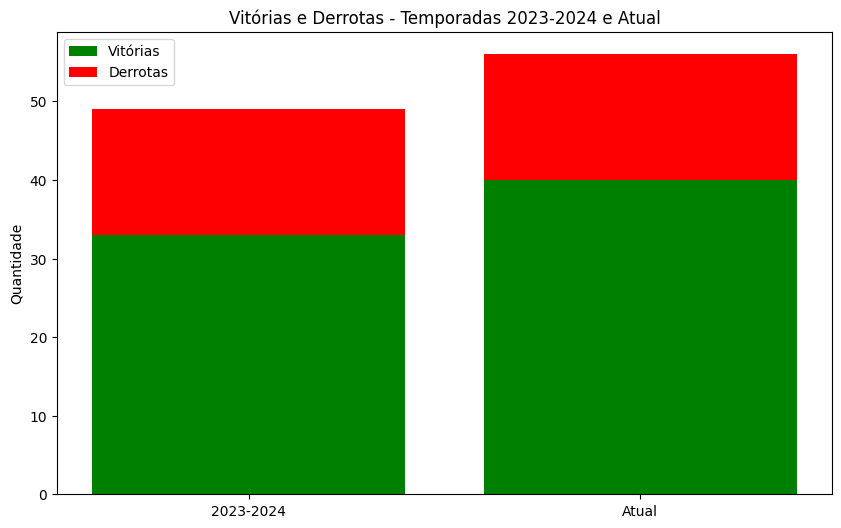

In [38]:
labels = ['2023-2024', 'Atual']
wins = [total_wins_2023_24, total_wins_current]
losses = [total_losses_2023_24, total_losses_current]

plt.figure(figsize=(10, 6))
plt.bar(labels, wins, color='green', label='Vitórias')
plt.bar(labels, losses, bottom=wins, color='red', label='Derrotas')
plt.title("Vitórias e Derrotas - Temporadas 2023-2024 e Atual")
plt.ylabel("Quantidade")
plt.legend()
plt.show()


Gráfico de Barras Agrupado para Vitórias e Derrotas em Casa e Fora

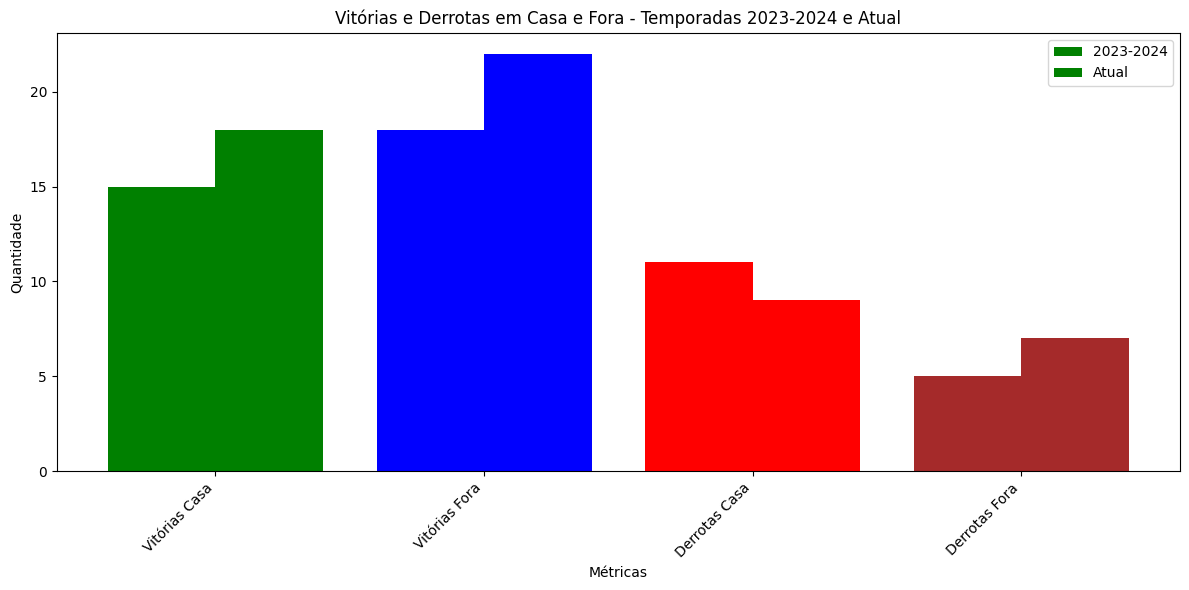

In [39]:
labels = ['Vitórias Casa', 'Vitórias Fora', 'Derrotas Casa', 'Derrotas Fora']
values_2023_24 = [home_wins_2023_24, away_wins_2023_24, home_losses_2023_24, away_losses_2023_24]
values_current = [home_wins_current, away_wins_current, home_losses_current, away_losses_current]

x = range(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(x, values_2023_24, width=0.4, label='2023-2024', color=['green', 'blue', 'red', 'brown'], align='center')
plt.bar([p + 0.4 for p in x], values_current, width=0.4, label='Atual', color=['green', 'blue', 'red', 'brown'], align='center')

plt.title("Vitórias e Derrotas em Casa e Fora - Temporadas 2023-2024 e Atual")
plt.xlabel("Métricas")
plt.ylabel("Quantidade")
plt.xticks([p + 0.2 for p in x], labels, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


Gráfico Histograma para exibir a frequência de vitórias e derrotas

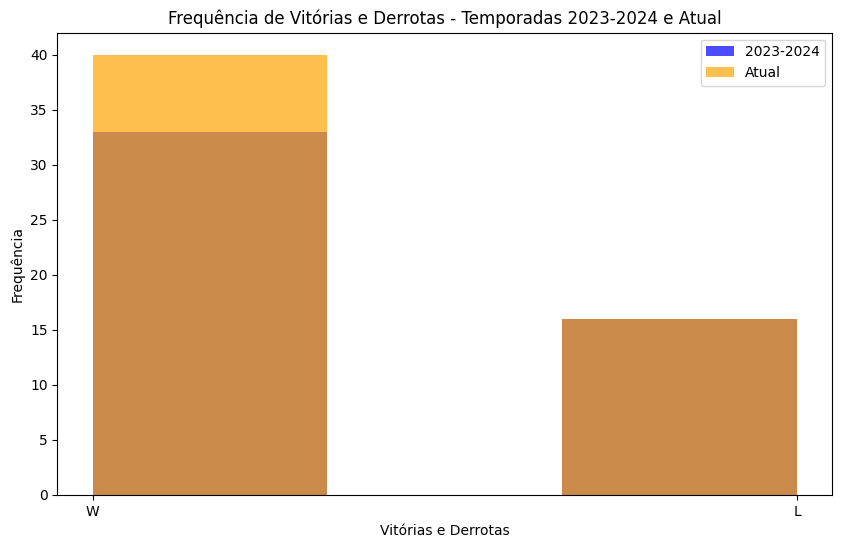

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(celtics_games_2023_24['WL'], bins=3, color='blue', alpha=0.7, label='2023-2024')
plt.hist(games_current['WL'], bins=3, color='orange', alpha=0.7, label='Atual')
plt.title("Frequência de Vitórias e Derrotas - Temporadas 2023-2024 e Atual")
plt.xlabel("Vitórias e Derrotas")
plt.ylabel("Frequência")
plt.legend()
plt.show()


Gráfico de Setor (Pizza) para o percentual de vitórias e derrotas em casa e fora

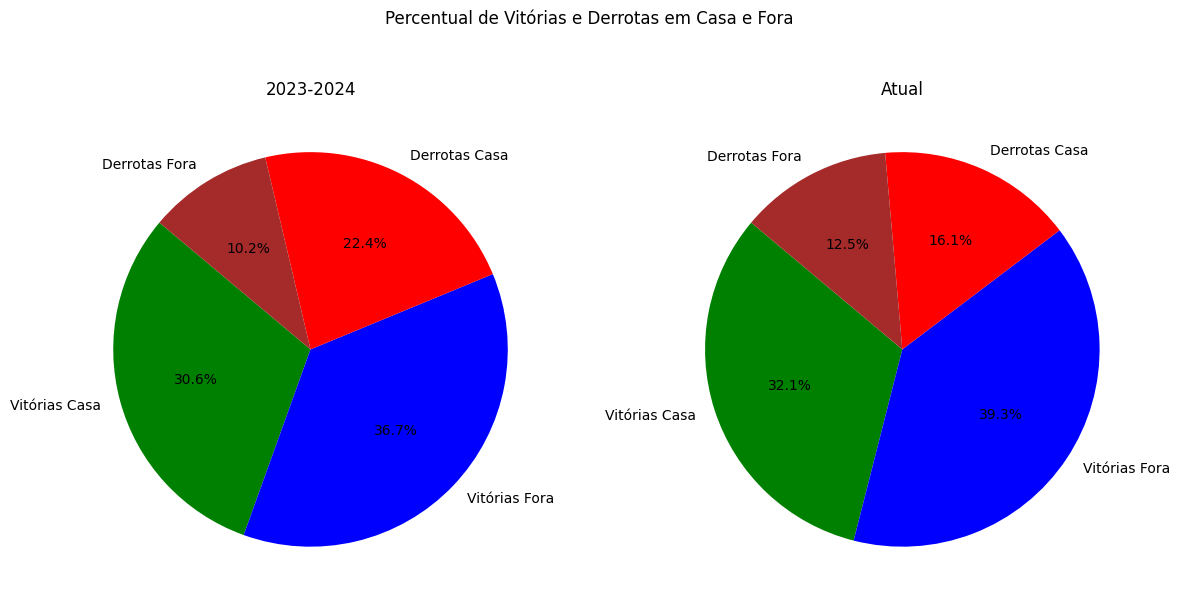

In [41]:
labels = ['Vitórias Casa', 'Vitórias Fora', 'Derrotas Casa', 'Derrotas Fora']
sizes_2023_24 = [home_wins_2023_24, away_wins_2023_24, home_losses_2023_24, away_losses_2023_24]
sizes_current = [home_wins_current, away_wins_current, home_losses_current, away_losses_current]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.pie(sizes_2023_24, labels=labels, autopct='%1.1f%%', colors=['green', 'blue', 'red', 'brown'], startangle=140)
ax1.set_title('2023-2024')
ax2.pie(sizes_current, labels=labels, autopct='%1.1f%%', colors=['green', 'blue', 'red', 'brown'], startangle=140)
ax2.set_title('Atual')
plt.suptitle("Percentual de Vitórias e Derrotas em Casa e Fora")
plt.show()


Gráfico de Radar exibindo a média de pontos marcados e sofridos em casa e fora

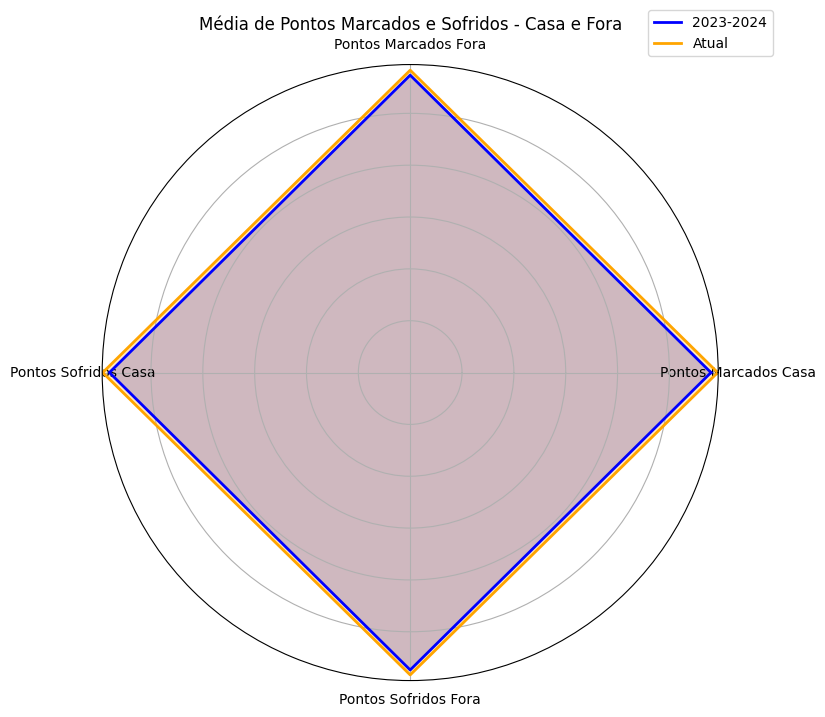

In [42]:
import numpy as np

labels = ['Pontos Marcados Casa', 'Pontos Marcados Fora', 'Pontos Sofridos Casa', 'Pontos Sofridos Fora']
stats_2023_24 = [points_scored_home_2023_24, points_scored_away_2023_24, points_conceded_home_2023_24, points_conceded_away_2023_24]
stats_current = [points_scored_home_current, points_scored_away_current, points_conceded_home_current, points_conceded_away_current]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats_2023_24 += stats_2023_24[:1]
stats_current += stats_current[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, stats_2023_24, color='blue', alpha=0.25)
ax.fill(angles, stats_current, color='orange', alpha=0.25)
ax.plot(angles, stats_2023_24, color='blue', linewidth=2, label='2023-2024')
ax.plot(angles, stats_current, color='orange', linewidth=2, label='Atual')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title("Média de Pontos Marcados e Sofridos - Casa e Fora")
plt.show()


Gráfico de Linhas exibindo a sequência de vitórias e derrotas ao longo da temporada

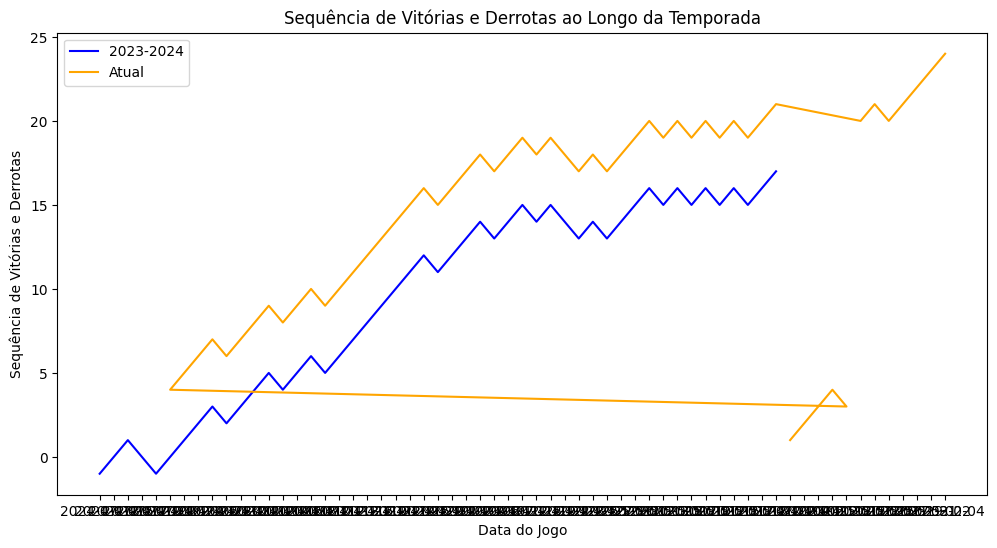

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(dates_2023_24, win_loss_sequence_2023_24, label='2023-2024', color='blue')
plt.plot(dates_current, win_loss_sequence_current, label='Atual', color='orange')
plt.title("Sequência de Vitórias e Derrotas ao Longo da Temporada")
plt.xlabel("Data do Jogo")
plt.ylabel("Sequência de Vitórias e Derrotas")
plt.legend()
plt.show()


Gráfico de Dispersão exibindo equipes e a média de pontos marcados e sofridos

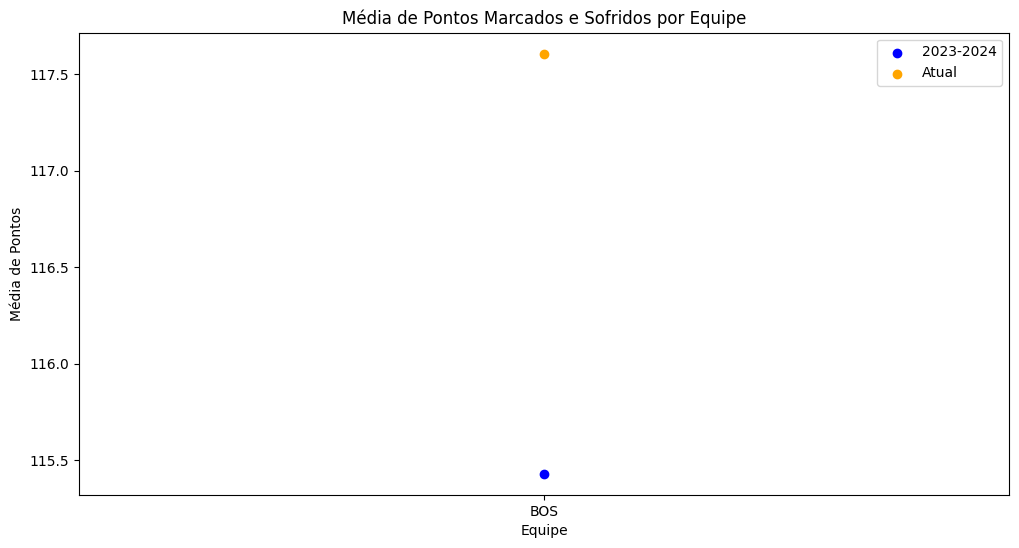

In [44]:
plt.figure(figsize=(12, 6))
plt.scatter(team_points_2023_24['TEAM_ABBREVIATION'], team_points_2023_24['PTS'], label='2023-2024', color='blue')
plt.scatter(team_points_current['TEAM_ABBREVIATION'], team_points_current['PTS'], label='Atual', color='orange')
plt.title("Média de Pontos Marcados e Sofridos por Equipe")
plt.xlabel("Equipe")
plt.ylabel("Média de Pontos")
plt.legend()
plt.show()


Gráfico de Barras para Dados Defensivos (RF6)

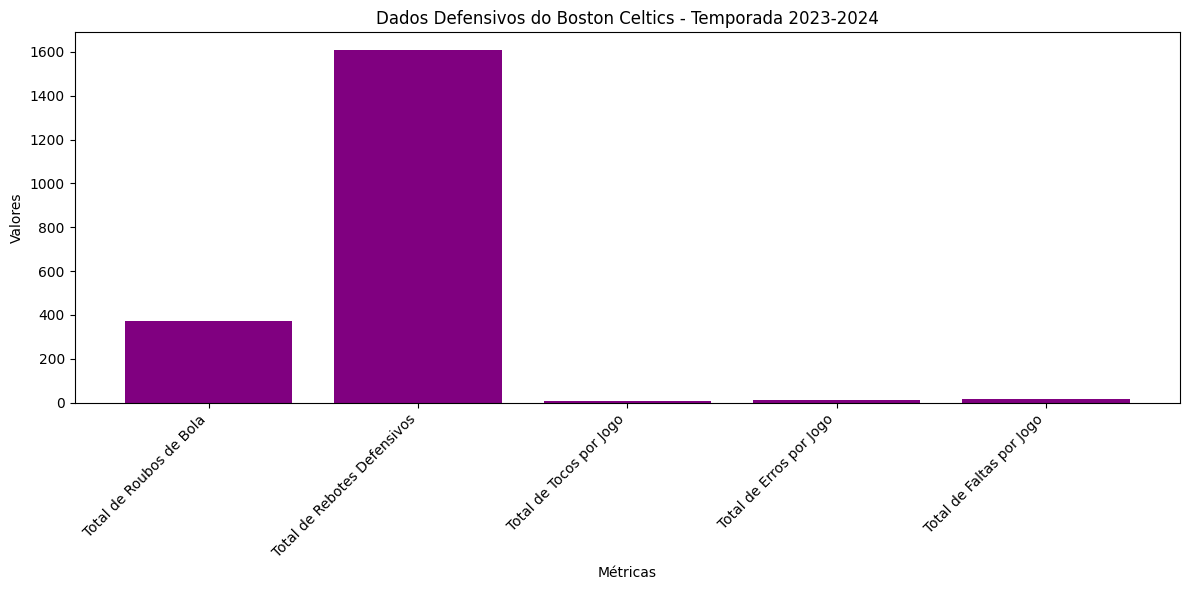

In [45]:
labels = list(celtics_defensive_stats_2023_24.keys())
values = list(celtics_defensive_stats_2023_24.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='purple')
plt.title("Dados Defensivos do Boston Celtics - Temporada 2023-2024")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Gráfico de Linhas para Jogos (RF7)

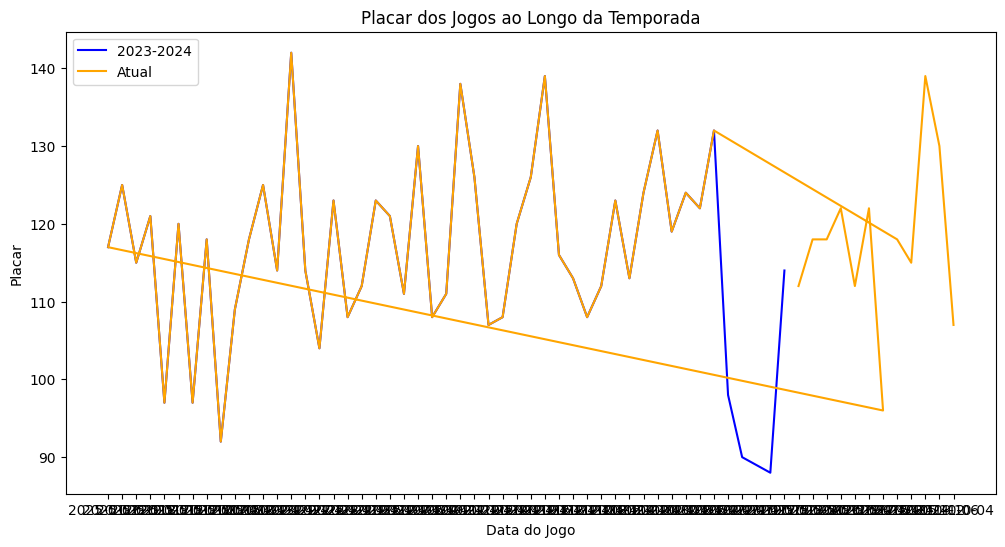

In [46]:
def present_games(team_games):
    games_info = team_games[['GAME_DATE', 'MATCHUP', 'WL', 'PTS']].copy()
    games_info['Adversário'] = games_info['MATCHUP'].apply(extract_opponent)
    games_info['Casa ou Fora'] = games_info['MATCHUP'].apply(home_or_away)
    games_info.rename(columns={'GAME_DATE': 'Data do Jogo', 'WL': 'Vitória ou Derrota', 'PTS': 'Placar'}, inplace=True)
    
    return games_info[['Data do Jogo', 'Adversário', 'Vitória ou Derrota', 'Casa ou Fora', 'Placar']]

games_info_current = present_games(games_current)

plt.figure(figsize=(12, 6))
plt.plot(games_info_2023_24['Data do Jogo'], games_info_2023_24['Placar'], label='2023-2024', color='blue')
plt.plot(games_info_current['Data do Jogo'], games_info_current['Placar'], label='Atual', color='orange')
plt.title("Placar dos Jogos ao Longo da Temporada")
plt.xlabel("Data do Jogo")
plt.ylabel("Placar")
plt.legend()
plt.show()


### **RF9 - Para cada tabela e/ou requisito que exiba dados gerados pelo sistema será necessário que os dados sejam salvos em um arquivo csv.**

In [47]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd
import os

season_current = "2024-25"
season_2023_24 = "2023-24"

gamefinder_2023_24 = leaguegamefinder.LeagueGameFinder(team_id_nullable=1610612738, season_nullable=season_2023_24)
games_2023_24 = gamefinder_2023_24.get_data_frames()[0]

gamefinder_current = leaguegamefinder.LeagueGameFinder(team_id_nullable=1610612738, season_nullable=season_current)
games_current = gamefinder_current.get_data_frames()[0]

def calculate_team_stats_season(team_games):
    total_games = len(team_games)
    if total_games > 0:
        points_per_game = team_games['PTS'].sum() / total_games
        assists_per_game = team_games['AST'].sum() / total_games
        rebounds_per_game = team_games['REB'].sum() / total_games
    else:
        points_per_game = 0
        assists_per_game = 0
        rebounds_per_game = 0
    total_3_points_made = team_games['FG3M'].sum()
    home_losses = team_games[(team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("vs."))].shape[0]
    away_losses = team_games[(team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("@"))].shape[0]
    stats = {
        'Pontos por Jogo': round(points_per_game, 2),
        'Assistências por Jogo': round(assists_per_game, 2),
        'Rebotes por Jogo': round(rebounds_per_game, 2),
        'Cestas de 3 Pontos Convertidas': int(total_3_points_made),
        'Derrotas em Casa': home_losses,
        'Derrotas Fora de Casa': away_losses
    }
    return stats

def calculate_detailed_stats(team_games):
    total_rebounds = team_games['REB'].sum()
    offensive_rebounds = team_games['OREB'].sum()
    defensive_rebounds = team_games['DREB'].sum()
    total_points = team_games['PTS'].sum()
    two_point_made = (team_games['FGM'] - team_games['FG3M']).sum()
    three_point_made = team_games['FG3M'].sum()
    free_throws_made = team_games['FTM'].sum()
    detailed_stats = {
        'Total de Rebotes': total_rebounds,
        'Total de Rebotes Ofensivos': offensive_rebounds,
        'Total de Rebotes Defensivos': defensive_rebounds,
        'Total de Pontos': total_points,
        'Total de Cestas de 2 Pontos': two_point_made,
        'Total de Cestas de 3 Pontos': three_point_made,
        'Total de Lances Livres': free_throws_made
    }
    return detailed_stats

def calculate_defensive_stats(team_games):
    total_games = len(team_games)
    total_steals = team_games['STL'].sum()
    defensive_rebounds = team_games['DREB'].sum()
    blocks_per_game = team_games['BLK'].sum() / total_games if total_games > 0 else 0
    turnovers_per_game = team_games['TOV'].sum() / total_games if total_games > 0 else 0
    fouls_per_game = team_games['PF'].sum() / total_games if total_games > 0 else 0
    defensive_stats = {
        'Total de Roubos de Bola': total_steals,
        'Total de Rebotes Defensivos': defensive_rebounds,
        'Total de Tocos por Jogo': round(blocks_per_game, 2),
        'Total de Erros por Jogo': round(turnovers_per_game, 2),
        'Total de Faltas por Jogo': round(fouls_per_game, 2)
    }
    return defensive_stats

def present_games(team_games):
    games_info = team_games[['GAME_DATE', 'MATCHUP', 'WL', 'PTS']].copy()
    games_info['Adversário'] = games_info['MATCHUP'].apply(extract_opponent)
    games_info['Casa ou Fora'] = games_info['MATCHUP'].apply(home_or_away)
    games_info.rename(columns={'GAME_DATE': 'Data do Jogo', 'WL': 'Vitória ou Derrota', 'PTS': 'Placar'}, inplace=True)
    return games_info[['Data do Jogo', 'Adversário', 'Vitória ou Derrota', 'Casa ou Fora', 'Placar']]

def extract_opponent(matchup, team_name="Boston Celtics"):
    if "vs." in matchup:
        return matchup.replace(f"{team_name} vs. ", "")
    elif "@" in matchup:
        return matchup.replace(f"{team_name} @ ", "")
    else:
        return matchup

def home_or_away(matchup):
    if "vs." in matchup:
        return "Casa"
    elif "@" in matchup:
        return "Fora"
    else:
        return "Indefinido"

celtics_stats_2023_24 = calculate_team_stats_season(games_2023_24)
celtics_detailed_stats_2023_24 = calculate_detailed_stats(games_2023_24)
celtics_defensive_stats_2023_24 = calculate_defensive_stats(games_2023_24)
games_info_2023_24 = present_games(games_2023_24)

celtics_stats_current = calculate_team_stats_season(games_current)
celtics_detailed_stats_current = calculate_detailed_stats(games_current)
celtics_defensive_stats_current = calculate_defensive_stats(games_current)
games_info_current = present_games(games_current)

print("Estatísticas Gerais - Temporada 2023-2024:")
print(celtics_stats_2023_24)
print("\nEstatísticas Gerais - Temporada Atual:")
print(celtics_stats_current)
print("\nDivisão dos Dados - Temporada 2023-2024:")
print(celtics_detailed_stats_2023_24)
print("\nDivisão dos Dados - Temporada Atual:")
print(celtics_detailed_stats_current)
print("\nDados Defensivos - Temporada 2023-2024:")
print(celtics_defensive_stats_2023_24)
print("\nDados Defensivos - Temporada Atual:")
print(celtics_defensive_stats_current)
print("\nJogos - Temporada 2023-2024:")
print(games_info_2023_24.head())
print("\nJogos - Temporada Atual:")
print(games_info_current.head())

output_filename = "celtics_analysis_data.csv"

def save_to_csv(df, filename, mode='a', header=False):
    filepath = os.path.join(output_dir, filename)
    df.to_csv(filepath, mode=mode, header=header, index=False)
    print(f"Dados salvos em: {filepath}")

output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

stats_2023_24_df = pd.DataFrame([celtics_stats_2023_24])
save_to_csv(stats_2023_24_df, output_filename, mode='w', header=True)

stats_current_df = pd.DataFrame([celtics_stats_current])
save_to_csv(stats_current_df, output_filename, mode='a', header=False)

detailed_stats_2023_24_df = pd.DataFrame([celtics_detailed_stats_2023_24])
save_to_csv(detailed_stats_2023_24_df, output_filename, mode='a', header=False)

detailed_stats_current_df = pd.DataFrame([celtics_detailed_stats_current])
save_to_csv(detailed_stats_current_df, output_filename, mode='a', header=False)

defensive_stats_2023_24_df = pd.DataFrame([celtics_defensive_stats_2023_24])
save_to_csv(defensive_stats_2023_24_df, output_filename, mode='a', header=False)

defensive_stats_current_df = pd.DataFrame([celtics_defensive_stats_current])
save_to_csv(defensive_stats_current_df, output_filename, mode='a', header=False)

save_to_csv(games_info_2023_24, output_filename, mode='a', header=False)

save_to_csv(games_info_current, output_filename, mode='a', header=False)

win_loss_sequence_2023_24_df = pd.DataFrame({'Data do Jogo': dates_2023_24, 'Sequência': win_loss_sequence_2023_24})
save_to_csv(win_loss_sequence_2023_24_df, output_filename, mode='a', header=False)

win_loss_sequence_current_df = pd.DataFrame({'Data do Jogo': dates_current, 'Sequência': win_loss_sequence_current})
save_to_csv(win_loss_sequence_current_df, output_filename, mode='a', header=False)

save_to_csv(team_points_2023_24, output_filename, mode='a', header=False)
save_to_csv(team_points_current, output_filename, mode='a', header=False)



Estatísticas Gerais - Temporada 2023-2024:
{'Pontos por Jogo': 118.27, 'Assistências por Jogo': 26.24, 'Rebotes por Jogo': 45.89, 'Cestas de 3 Pontos Convertidas': 1705, 'Derrotas em Casa': 6, 'Derrotas Fora de Casa': 16}

Estatísticas Gerais - Temporada Atual:
{'Pontos por Jogo': 117.61, 'Assistências por Jogo': 26.21, 'Rebotes por Jogo': 44.91, 'Cestas de 3 Pontos Convertidas': 1003, 'Derrotas em Casa': 9, 'Derrotas Fora de Casa': 7}

Divisão dos Dados - Temporada 2023-2024:
{'Total de Rebotes': 4864, 'Total de Rebotes Ofensivos': 1126, 'Total de Rebotes Defensivos': 3738, 'Total de Pontos': 12537, 'Total de Cestas de 2 Pontos': 2851, 'Total de Cestas de 3 Pontos': 1705, 'Total de Lances Livres': 1720}

Divisão dos Dados - Temporada Atual:
{'Total de Rebotes': 2515, 'Total de Rebotes Ofensivos': 621, 'Total de Rebotes Defensivos': 1894, 'Total de Pontos': 6586, 'Total de Cestas de 2 Pontos': 1328, 'Total de Cestas de 3 Pontos': 1003, 'Total de Lances Livres': 921}

Dados Defensivos -

### **RF10 - Para cada gráfico gerado pelo sistema será necessário que sejam exibidos em formato HTML e abertos no Browser.**

In [48]:
import plotly.graph_objects as go
import plotly.express as px
import webbrowser
from pathlib import Path

html_output_dir = "html_output"
os.makedirs(html_output_dir, exist_ok=True)

def save_and_open_html(fig, filename):
    filepath = Path(html_output_dir) / filename
    fig.write_html(filepath)
    webbrowser.open(f"file://{filepath.resolve()}")

labels = ['2023-2024', 'Atual']
wins = [total_wins_2023_24, total_wins_current]
losses = [total_losses_2023_24, total_losses_current]

fig = go.Figure(data=[
    go.Bar(name='Vitórias', x=labels, y=wins, marker_color='green'),
    go.Bar(name='Derrotas', x=labels, y=losses, marker_color='red')
])
fig.update_layout(barmode='stack', title="Vitórias e Derrotas - Temporadas 2023-2024 e Atual")
save_and_open_html(fig, "stacked_bar_wins_losses.html")

labels = ['Vitórias Casa', 'Vitórias Fora', 'Derrotas Casa', 'Derrotas Fora']
values_2023_24 = [home_wins_2023_24, away_wins_2023_24, home_losses_2023_24, away_losses_2023_24]
values_current = [home_wins_current, away_wins_current, home_losses_current, away_losses_current]

fig = go.Figure(data=[
    go.Bar(name='2023-2024', x=labels, y=values_2023_24, marker_color=['green', 'blue', 'red', 'brown']),
    go.Bar(name='Atual', x=labels, y=values_current, marker_color=['green', 'blue', 'red', 'brown'])
])
fig.update_layout(barmode='group', title="Vitórias e Derrotas em Casa e Fora - Temporadas 2023-2024 e Atual")
save_and_open_html(fig, "grouped_bar_home_away_wins_losses.html")

fig = px.histogram(celtics_games_2023_24, x='WL', title="Frequência de Vitórias e Derrotas - Temporada 2023-2024", color='WL')
save_and_open_html(fig, "histogram_wins_losses_2023_24.html")

fig = px.histogram(games_current, x='WL', title="Frequência de Vitórias e Derrotas - Temporada Atual", color='WL')
save_and_open_html(fig, "histogram_wins_losses_current.html")

labels = ['Vitórias Casa', 'Vitórias Fora', 'Derrotas Casa', 'Derrotas Fora']
sizes_2023_24 = [home_wins_2023_24, away_wins_2023_24, home_losses_2023_24, away_losses_2023_24]
sizes_current = [home_wins_current, away_wins_current, home_losses_current, away_losses_current]

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes_2023_24, hole=.3)])
fig.update_layout(title="Percentual de Vitórias e Derrotas em Casa e Fora - Temporada 2023-2024")
save_and_open_html(fig, "pie_chart_home_away_wins_losses_2023_24.html")

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes_current, hole=.3)])
fig.update_layout(title="Percentual de Vitórias e Derrotas em Casa e Fora - Temporada Atual")
save_and_open_html(fig, "pie_chart_home_away_wins_losses_current.html")

labels = ['Pontos Marcados Casa', 'Pontos Marcados Fora', 'Pontos Sofridos Casa', 'Pontos Sofridos Fora']
stats_2023_24 = [points_scored_home_2023_24, points_scored_away_2023_24, points_conceded_home_2023_24, points_conceded_away_2023_24]
stats_current = [points_scored_home_current, points_scored_away_current, points_conceded_home_current, points_conceded_away_current]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=stats_2023_24, theta=labels, fill='toself', name='2023-2024', marker_color='blue'))
fig.add_trace(go.Scatterpolar(r=stats_current, theta=labels, fill='toself', name='Atual', marker_color='orange'))
fig.update_layout(title="Média de Pontos Marcados e Sofridos - Casa e Fora")
save_and_open_html(fig, "radar_chart_points_scored_conceded.html")

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_2023_24, y=win_loss_sequence_2023_24, mode='lines', name='2023-2024', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=dates_current, y=win_loss_sequence_current, mode='lines', name='Atual', line=dict(color='orange')))
fig.update_layout(title="Sequência de Vitórias e Derrotas ao Longo da Temporada", xaxis_title="Data do Jogo", yaxis_title="Sequência de Vitórias e Derrotas")
save_and_open_html(fig, "line_chart_win_loss_sequence.html")

fig = px.scatter(team_points_2023_24, x='TEAM_ABBREVIATION', y='PTS', title="Média de Pontos Marcados e Sofridos por Equipe - Temporada 2023-2024")
save_and_open_html(fig, "scatter_plot_team_points_2023_24.html")

fig = px.scatter(team_points_current, x='TEAM_ABBREVIATION', y='PTS', title="Média de Pontos Marcados e Sofridos por Equipe - Temporada Atual")
save_and_open_html(fig, "scatter_plot_team_points_current.html")


## **PARTE 2**

### **RF1: Dados Básicos dos Jogadores**

In [49]:
import pandas as pd

players_df = pd.read_csv('../data/players.csv')

players_df['Experiência'] = players_df['Experiência'].apply(lambda x: 0 if x == 'Rookie' else x)

def show_player_data():
    print(players_df[['Nome', 'Altura', 'Peso', 'Idade', 'Experiência', 'Posição', 'Universidade', 'Salário']])

show_player_data()


                   Nome                      Altura Peso                Idade  \
0          Jayson Tatum                    Duke/USA  6-8         jayson-tatum   
1         Derrick White                Colorado/USA  6-4        derrick-white   
2          Jaylen Brown              California/USA  6-6         jaylen-brown   
3            Al Horford  Florida/Dominican Republic  6-9           al-horford   
4          Marcus Smart          Oklahoma State/USA  6-3         marcus-smart   
5   Robert Williams III               Texas A&M/USA  6-9  robert-williams-iii   
6       Malcolm Brogdon                Virginia/USA  6-4      malcolm-brogdon   
7            Sam Hauser                Virginia/USA  6-7           sam-hauser   
8           Luke Kornet              Vanderbilt/USA  7-1          luke-kornet   
9      Payton Pritchard                  Oregon/USA  6-1     payton-pritchard   
10       Grant Williams               Tennessee/USA  6-6       grant-williams   
11         Juwan Morgan     

### **RF2: Dados dos Jogadores em Partidas**

In [50]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.static import players
import pandas as pd

def get_player_id(player_name):
    player_dict = players.get_players()
    player_data = [player for player in player_dict if player['full_name'] == player_name]
    if player_data:
        return player_data[0]['id']
    else:
        raise ValueError(f"Jogador {player_name} não encontrado.")

def get_player_games(player_id):
    player_game_log = playergamelog.PlayerGameLog(player_id=player_id, season="2024")
    games = player_game_log.get_data_frames()[0]
    return games

def show_player_game_data(player_name):
    try:
        player_id = get_player_id(player_name)
        
        games = get_player_games(player_id)
        
        print(f"Colunas disponíveis para {player_name}: {games.columns.tolist()}")
        
        if games.empty:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
            return
        
        player_game_data = []
        
        for _, game in games.iterrows():
            game_date = game['GAME_DATE']
            opponent = game['MATCHUP']
            result = game['WL']
            location = "Casa" if 'vs' in opponent else "Fora"
            points = game['PTS']
            rebounds = game['REB']
            assists = game['AST']
            three_point_attempts = game['FG3A']
            three_point_made = game['FG3M']
            minutes = game['MIN']
            
            player_game_data.append({
                'Data do Jogo': game_date,
                'Adversário': opponent,
                'V ou D': result,
                'Casa/Fora': location,
                'PTS': points,
                'REB': rebounds,
                'AST': assists,
                'FG3A': three_point_attempts,
                'FG3_PCT': three_point_made,
                'MIN': minutes
            })
        
        if player_game_data:
            player_games_df = pd.DataFrame(player_game_data)
            print(f"Dados de jogo para {player_name}:\n", player_games_df)
        else:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
    
    except ValueError as e:
        print(e)

# Chamar dados de cada jogador individualmente
show_player_game_data('Jayson Tatum')
# show_player_game_data('Derrick White')
# show_player_game_data('Jaylen Brown')
# show_player_game_data('Al Horford')
# show_player_game_data('Marcus Smart')
# show_player_game_data('Robert Williams III')
# show_player_game_data('Malcolm Brogdon')
# show_player_game_data('Sam Hauser')
# show_player_game_data('Luke Kornet')
# show_player_game_data('Payton Pritchard')
# show_player_game_data('Grant Williams')
# show_player_game_data('Juwan Morgan')
# show_player_game_data('Matisse Thybulle')



Colunas disponíveis para Jayson Tatum: ['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE']
Dados de jogo para Jayson Tatum:
     Data do Jogo   Adversário V ou D Casa/Fora  PTS  REB  AST  FG3A  FG3_PCT  \
0   FEB 04, 2025    BOS @ CLE      W      Fora   22    4    7    11        3   
1   FEB 02, 2025    BOS @ PHI      W      Fora   35    7   11     8        5   
2   JAN 31, 2025    BOS @ NOP      W      Fora   27    6   10    10        4   
3   JAN 29, 2025  BOS vs. CHI      W      Casa   16    8    5     6        2   
4   JAN 27, 2025  BOS vs. HOU      L      Casa   19    6    7     7        1   
5   JAN 25, 2025    BOS @ DAL      W      Fora   24    6    3    12        4   
6   JAN 23, 2025    BOS @ LAL      L      Fora   16    6    5     6        2   
7   JAN 22, 2025    BOS @ LAC      W    

### **RF3: Dados dos Times em Partidas**

In [51]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd

def get_team_games(team_abbreviation):
    game_finder = leaguegamefinder.LeagueGameFinder(team_id_nullable=None)
    games = game_finder.get_data_frames()[0]
    
    filtered_games = games[games['MATCHUP'].str.contains(team_abbreviation, case=False)]
    
    if filtered_games.empty:
        print(f"Não há jogos encontrados para o time {team_abbreviation} na temporada 2024.")
        return
    
    team_game_data = []
    
    for _, game in filtered_games.iterrows():
        game_date = game['GAME_DATE']
        opponent = game['MATCHUP']
        result = game['WL']
        location = "Casa" if 'vs' in opponent else "Fora"
        team_points = game['PTS']
        opponent_points = game['PLUS_MINUS'] + team_points
        three_point_attempts = game['FG3A']
        three_point_made = game['FG3M']
        
        team_game_data.append({
            'Data do Jogo': game_date,
            'Adversário': opponent,
            'V ou D': result,
            'Casa/Fora': location,
            'Placar do Jogo': f"{team_points} - {opponent_points}",
            'Tentativas de Cestas de 3 PTS': three_point_attempts,
            'Cestas de 3 PTS Marcados': three_point_made
        })
    
    if team_game_data:
        team_games_df = pd.DataFrame(team_game_data)
        print(f"Dados de jogos do time {team_abbreviation}:")
        print(team_games_df.to_string(index=False))
    else:
        print(f"Não há dados disponíveis para o time {team_abbreviation}.")

# Exemplo de chamada
get_team_games('BOS')  # Filtra jogos do Boston Celtics


Dados de jogos do time BOS:
Data do Jogo  Adversário V ou D Casa/Fora Placar do Jogo  Tentativas de Cestas de 3 PTS  Cestas de 3 PTS Marcados
  2025-02-04 CLE vs. BOS      L      Casa     105 - 98.0                             39                        11
  2025-02-04   BOS @ CLE      W      Fora    112 - 119.0                             48                        17
  2025-02-02   BOS @ PHI      W      Fora    118 - 126.0                             49                        21
  2025-02-02 PHI vs. BOS      L      Casa    110 - 102.0                             32                        15
  2025-01-31   BOS @ NOP      W      Fora    118 - 120.0                             41                        16
  2025-01-31 NOP vs. BOS      L      Casa    116 - 114.0                             37                        15
  2025-01-29 BOS vs. CHI      W      Casa    122 - 144.0                             44                        18
  2025-01-29   CHI @ BOS      L      Fora     100 - 78.0    

### **RF4: Quantidade de Jogos (Dentro e Fora de Casa)**

In [52]:
from nba_api.stats.endpoints import leaguegamefinder

def get_team_game_counts(team_abbreviation):
    game_finder = leaguegamefinder.LeagueGameFinder(team_id_nullable=None)
    games = game_finder.get_data_frames()[0]
    
    filtered_games = games[games['MATCHUP'].str.contains(team_abbreviation, case=False)]
    
    if filtered_games.empty:
        print(f"Não há jogos encontrados para o time {team_abbreviation} na temporada 2024.")
        return
    
    home_games = sum('vs' in game for game in filtered_games['MATCHUP'])
    away_games = len(filtered_games) - home_games
    
    print(f"Total de jogos do {team_abbreviation}: ")
    print(f"Jogos em casa: {home_games}, Jogos fora: {away_games}")

def get_team_game_counts_against(team_abbreviation, opponent_team):
    game_finder = leaguegamefinder.LeagueGameFinder(team_id_nullable=None)
    games = game_finder.get_data_frames()[0]
    
    filtered_games = games[(games['MATCHUP'].str.contains(team_abbreviation, case=False)) & 
                           (games['MATCHUP'].str.contains(opponent_team, case=False))]
    
    if filtered_games.empty:
        print(f"Não há jogos encontrados entre {team_abbreviation} e {opponent_team} na temporada 2024.")
        return
    
    home_games = sum('vs' in game for game in filtered_games['MATCHUP'])
    away_games = len(filtered_games) - home_games
    
    print(f"Total de jogos entre {team_abbreviation} e {opponent_team}: ")
    print(f"Jogos em casa: {home_games}, Jogos fora: {away_games}")

# Exemplo de chamada
get_team_game_counts('BOS')  # Contagem de jogos do Los Angeles Lakers
get_team_game_counts_against('BOS', 'LAL')  # Contagem de jogos entre Lakers e Celtics


Total de jogos do BOS: 
Jogos em casa: 502, Jogos fora: 506
Total de jogos entre BOS e LAL: 
Jogos em casa: 11, Jogos fora: 11


### **RF5: Média de Pontos, Rebotes e Assistências**

In [53]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.static import players
import pandas as pd

def get_player_id(player_name):
    player_dict = players.get_players()
    player_data = [player for player in player_dict if player['full_name'] == player_name]
    if player_data:
        return player_data[0]['id']
    else:
        raise ValueError(f"Jogador {player_name} não encontrado.")

def get_player_stats(player_name):
    try:
        player_id = get_player_id(player_name)
        player_game_log = playergamelog.PlayerGameLog(player_id=player_id, season="2024")
        games = player_game_log.get_data_frames()[0]
        
        if games.empty:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
            return None
        
        avg_points = games['PTS'].mean()
        avg_rebounds = games['REB'].mean()
        avg_assists = games['AST'].mean()
        
        below_avg_pts = (games['PTS'] < avg_points).mean() * 100
        below_avg_reb = (games['REB'] < avg_rebounds).mean() * 100
        below_avg_ast = (games['AST'] < avg_assists).mean() * 100
        
        print(f"Médias de {player_name} na temporada: PTS={avg_points:.2f}, REB={avg_rebounds:.2f}, AST={avg_assists:.2f}")
        print(f"Porcentagem de jogos abaixo da média: PTS={below_avg_pts:.2f}%, REB={below_avg_reb:.2f}%, AST={below_avg_ast:.2f}%")
    except ValueError as e:
        print(e)

# Estatísticas dos jogadores específicos
for player in ['Jayson Tatum', 'Derrick White', 'Jaylen Brown']:
    get_player_stats(player)


Médias de Jayson Tatum na temporada: PTS=26.75, REB=8.75, AST=5.69
Porcentagem de jogos abaixo da média: PTS=50.00%, REB=50.00%, AST=52.08%
Médias de Derrick White na temporada: PTS=16.17, REB=4.23, AST=4.17
Porcentagem de jogos abaixo da média: PTS=45.83%, REB=60.42%, AST=64.58%
Médias de Jaylen Brown na temporada: PTS=23.14, REB=6.14, AST=4.84
Porcentagem de jogos abaixo da média: PTS=50.00%, REB=59.09%, AST=52.27%


### **RF6: Mediana de Pontos, Rebotes e Assistências**

In [54]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.static import players
import pandas as pd

def get_player_id(player_name):
    player_dict = players.get_players()
    player_data = [player for player in player_dict if player['full_name'] == player_name]
    if player_data:
        return player_data[0]['id']
    else:
        raise ValueError(f"Jogador {player_name} não encontrado.")

def get_player_stats(player_name):
    try:
        player_id = get_player_id(player_name)
        player_game_log = playergamelog.PlayerGameLog(player_id=player_id, season="2024")
        games = player_game_log.get_data_frames()[0]
        
        if games.empty:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
            return None
        
        median_points = games['PTS'].median()
        median_rebounds = games['REB'].median()
        median_assists = games['AST'].median()
        
        below_median_pts = (games['PTS'] < median_points).mean() * 100
        below_median_reb = (games['REB'] < median_rebounds).mean() * 100
        below_median_ast = (games['AST'] < median_assists).mean() * 100
        
        print(f"Medianas de {player_name} na temporada: PTS={median_points:.2f}, REB={median_rebounds:.2f}, AST={median_assists:.2f}")
        print(f"Porcentagem de jogos abaixo da mediana: PTS={below_median_pts:.2f}%, REB={below_median_reb:.2f}%, AST={below_median_ast:.2f}%")
    except ValueError as e:
        print(e)

# Estatísticas dos jogadores específicos
for player in ['Jayson Tatum', 'Derrick White', 'Jaylen Brown']:
    get_player_stats(player)


Medianas de Jayson Tatum na temporada: PTS=26.50, REB=8.50, AST=5.00
Porcentagem de jogos abaixo da mediana: PTS=50.00%, REB=50.00%, AST=39.58%
Medianas de Derrick White na temporada: PTS=17.00, REB=4.00, AST=4.00
Porcentagem de jogos abaixo da mediana: PTS=45.83%, REB=37.50%, AST=41.67%
Medianas de Jaylen Brown na temporada: PTS=23.50, REB=6.00, AST=4.00
Porcentagem de jogos abaixo da mediana: PTS=50.00%, REB=38.64%, AST=20.45%


### **RF7: Moda de Pontos, Rebotes e Assistências**

In [55]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.static import players
import pandas as pd

def get_player_id(player_name):
    player_dict = players.get_players()
    player_data = [player for player in player_dict if player['full_name'] == player_name]
    if player_data:
        return player_data[0]['id']
    else:
        raise ValueError(f"Jogador {player_name} não encontrado.")

def get_player_stats(player_name):
    try:
        player_id = get_player_id(player_name)
        player_game_log = playergamelog.PlayerGameLog(player_id=player_id, season="2024")
        games = player_game_log.get_data_frames()[0]
        
        if games.empty:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
            return None
        
        # Moda dos pontos, rebotes e assistências usando pandas
        mode_points = games['PTS'].mode()[0]
        mode_rebounds = games['REB'].mode()[0]
        mode_assists = games['AST'].mode()[0]
        
        # Contagem de quantas vezes a moda aparece
        mode_points_count = (games['PTS'] == mode_points).sum()
        mode_rebounds_count = (games['REB'] == mode_rebounds).sum()
        mode_assists_count = (games['AST'] == mode_assists).sum()
        
        # Média dos pontos, rebotes e assistências
        avg_points = games['PTS'].mean()
        avg_rebounds = games['REB'].mean()
        avg_assists = games['AST'].mean()
        
        # Porcentagem de jogos abaixo da média
        below_avg_pts = (games['PTS'] < avg_points).mean() * 100
        below_avg_reb = (games['REB'] < avg_rebounds).mean() * 100
        below_avg_ast = (games['AST'] < avg_assists).mean() * 100
        
        # Exibição dos resultados
        print(f"Moda de {player_name} na temporada:")
        print(f"  PTS={mode_points}, apareceu {mode_points_count} vezes")
        print(f"  REB={mode_rebounds}, apareceu {mode_rebounds_count} vezes")
        print(f"  AST={mode_assists}, apareceu {mode_assists_count} vezes")
        
        print(f"Porcentagem de jogos abaixo da média:")
        print(f"  PTS={below_avg_pts:.2f}%")
        print(f"  REB={below_avg_reb:.2f}%")
        print(f"  AST={below_avg_ast:.2f}%")
    
    except ValueError as e:
        print(e)

# Estatísticas dos jogadores específicos
for player in ['Jayson Tatum', 'Derrick White', 'Jaylen Brown']:
    get_player_stats(player)


Moda de Jayson Tatum na temporada:
  PTS=16, apareceu 4 vezes
  REB=6, apareceu 8 vezes
  AST=4, apareceu 10 vezes
Porcentagem de jogos abaixo da média:
  PTS=50.00%
  REB=50.00%
  AST=52.08%
Moda de Derrick White na temporada:
  PTS=17, apareceu 5 vezes
  REB=4, apareceu 11 vezes
  AST=4, apareceu 11 vezes
Porcentagem de jogos abaixo da média:
  PTS=45.83%
  REB=60.42%
  AST=64.58%
Moda de Jaylen Brown na temporada:
  PTS=28, apareceu 5 vezes
  REB=6, apareceu 9 vezes
  AST=4, apareceu 14 vezes
Porcentagem de jogos abaixo da média:
  PTS=50.00%
  REB=59.09%
  AST=52.27%


### **RF8: Desvio Padrão de Pontos, Rebotes e Assistências**

In [56]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.static import players
import pandas as pd

def get_player_id(player_name):
    player_dict = players.get_players()
    player_data = [player for player in player_dict if player['full_name'] == player_name]
    if player_data:
        return player_data[0]['id']
    else:
        raise ValueError(f"Jogador {player_name} não encontrado.")

def get_player_stats(player_name):
    try:
        player_id = get_player_id(player_name)
        player_game_log = playergamelog.PlayerGameLog(player_id=player_id, season="2024")
        games = player_game_log.get_data_frames()[0]
        
        if games.empty:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
            return None
        
        # Cálculo do Desvio Padrão dos pontos, rebotes e assistências
        std_points = games['PTS'].std()
        std_rebounds = games['REB'].std()
        std_assists = games['AST'].std()
        
        # Exibição dos resultados
        print(f"Desvio Padrão de {player_name} na temporada:")
        print(f"  PTS={std_points:.2f}")
        print(f"  REB={std_rebounds:.2f}")
        print(f"  AST={std_assists:.2f}")
    
    except ValueError as e:
        print(e)

# Estatísticas dos jogadores específicos
for player in ['Jayson Tatum', 'Derrick White', 'Jaylen Brown']:
    get_player_stats(player)


Desvio Padrão de Jayson Tatum na temporada:
  PTS=7.34
  REB=2.93
  AST=2.60
Desvio Padrão de Derrick White na temporada:
  PTS=6.33
  REB=2.01
  AST=2.12
Desvio Padrão de Jaylen Brown na temporada:
  PTS=7.12
  REB=2.71
  AST=1.80


### **RF9: Pontos, Rebotes e Assistências de Toda a Carreira**

In [57]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.static import players
import pandas as pd

def get_player_id(player_name):
    player_dict = players.get_players()
    player_data = [player for player in player_dict if player['full_name'] == player_name]
    if player_data:
        return player_data[0]['id']
    else:
        raise ValueError(f"Jogador {player_name} não encontrado.")

def get_player_career_stats(player_name):
    try:
        player_id = get_player_id(player_name)
        
        # Obtendo os logs de todos os jogos do jogador (não apenas da temporada 2024)
        player_game_log = playergamelog.PlayerGameLog(player_id=player_id)
        games = player_game_log.get_data_frames()[0]
        
        if games.empty:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
            return None
        
        # Total de pontos, rebotes e assistências ao longo de toda a carreira
        total_points = games['PTS'].sum()
        total_rebounds = games['REB'].sum()
        total_assists = games['AST'].sum()
        
        # Exibição dos resultados
        print(f"Estatísticas de Carreira de {player_name}:")
        print(f"  Total de pontos: {total_points}")
        print(f"  Total de rebotes: {total_rebounds}")
        print(f"  Total de assistências: {total_assists}")
    
    except ValueError as e:
        print(e)

# Estatísticas dos jogadores específicos
for player in ['Jayson Tatum', 'Derrick White', 'Jaylen Brown']:
    get_player_career_stats(player)


Estatísticas de Carreira de Jayson Tatum:
  Total de pontos: 1284
  Total de rebotes: 420
  Total de assistências: 273
Estatísticas de Carreira de Derrick White:
  Total de pontos: 776
  Total de rebotes: 203
  Total de assistências: 200


ReadTimeout: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)

### **R10: Comparação de Pontos, Rebotes e Assistências de Toda a Carreira x Temporada Atual**

Comparação entre Temporada Atual e Carreira de Jayson Tatum:
Estatísticas              Temporada Atual Carreira
------------------------------------------------------------
Total de Jogos            46              559
Média de Pontos           26.67           1634.88
Média de Assistências     5.54            258.38
Média de Rebotes          8.89            509.88
Minutos em Quadra         36.33           2404.12


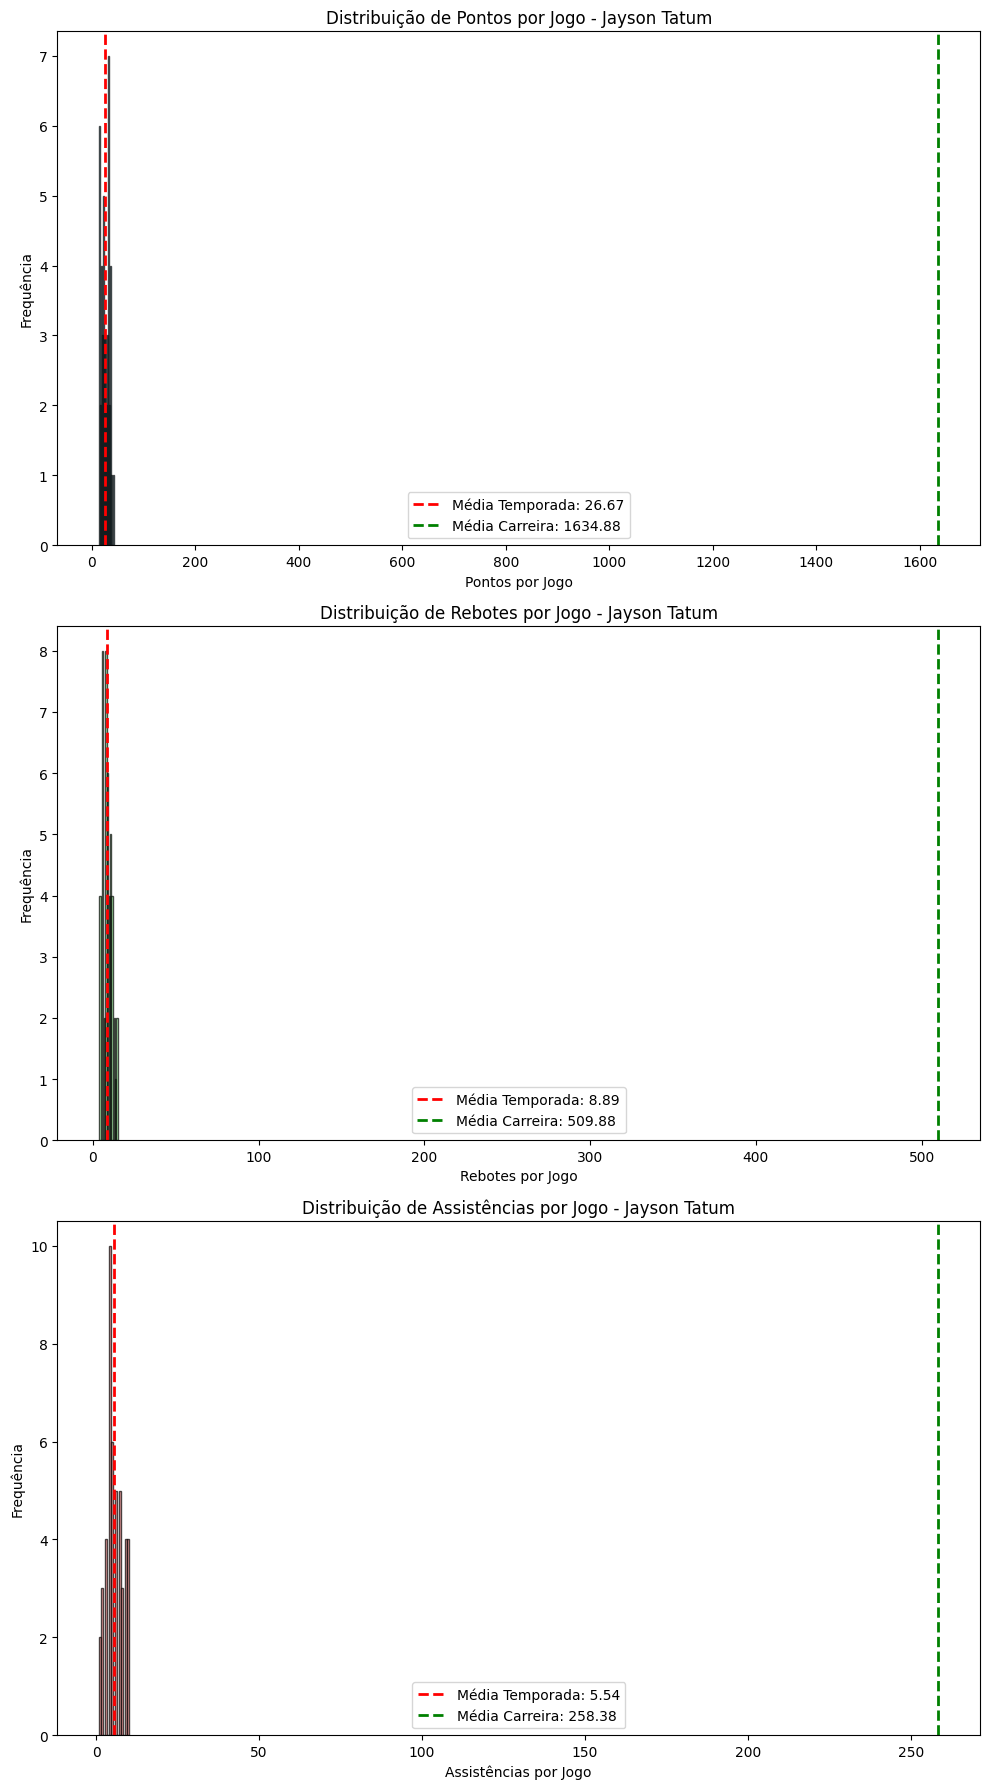

C:\Users\Pikachu\AppData\Local\Temp\ipykernel_15268\1975794354.py:94: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=False, patch_artist=True,


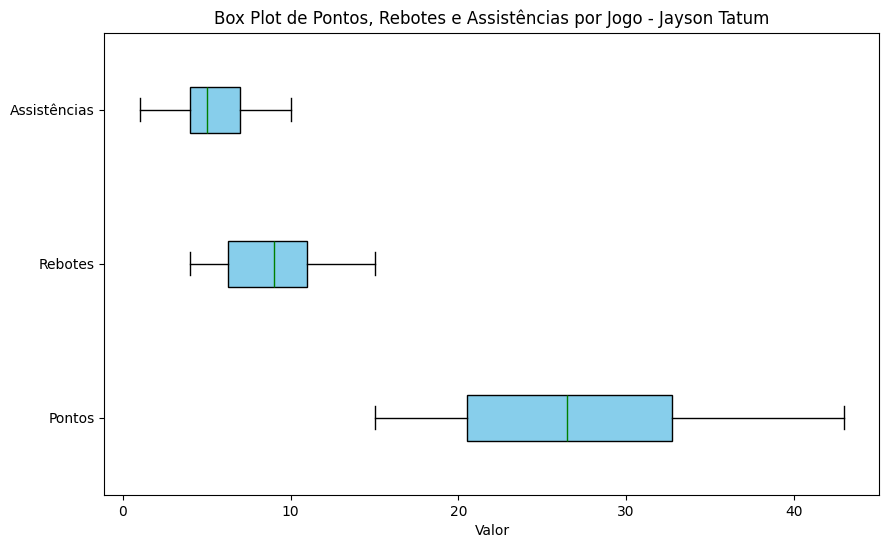

Comparação entre Temporada Atual e Carreira de Derrick White:
Estatísticas              Temporada Atual Carreira
------------------------------------------------------------
Total de Jogos            46              539
Média de Pontos           16.07           688.20
Média de Assistências     4.11            225.90
Média de Rebotes          4.28            192.50
Minutos em Quadra         33.70           1525.90


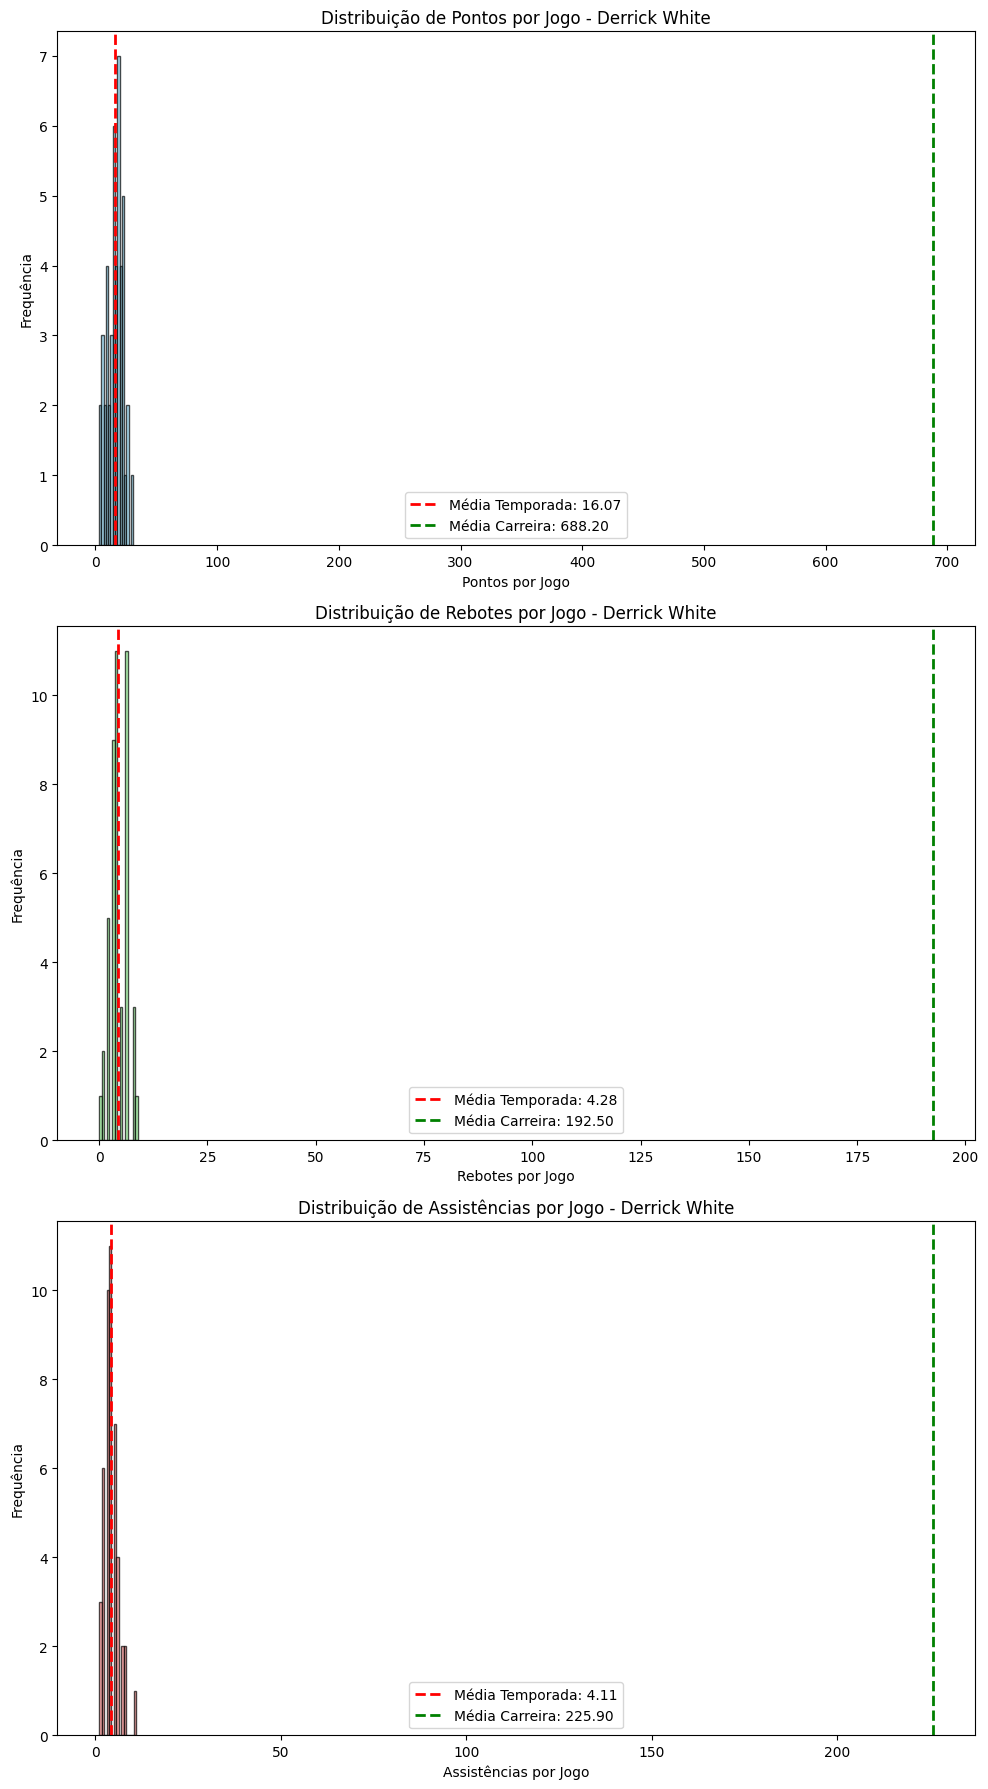

C:\Users\Pikachu\AppData\Local\Temp\ipykernel_15268\1975794354.py:94: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=False, patch_artist=True,


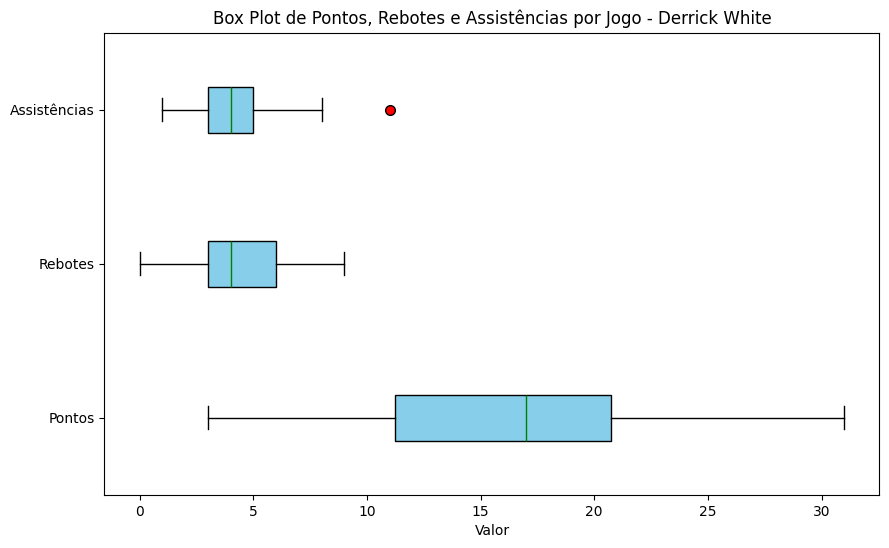

Comparação entre Temporada Atual e Carreira de Jaylen Brown:
Estatísticas              Temporada Atual Carreira
------------------------------------------------------------
Total de Jogos            42              582
Média de Pontos           23.36           1224.33
Média de Assistências     4.79            167.11
Média de Rebotes          5.98            343.44
Minutos em Quadra         35.48           1977.33


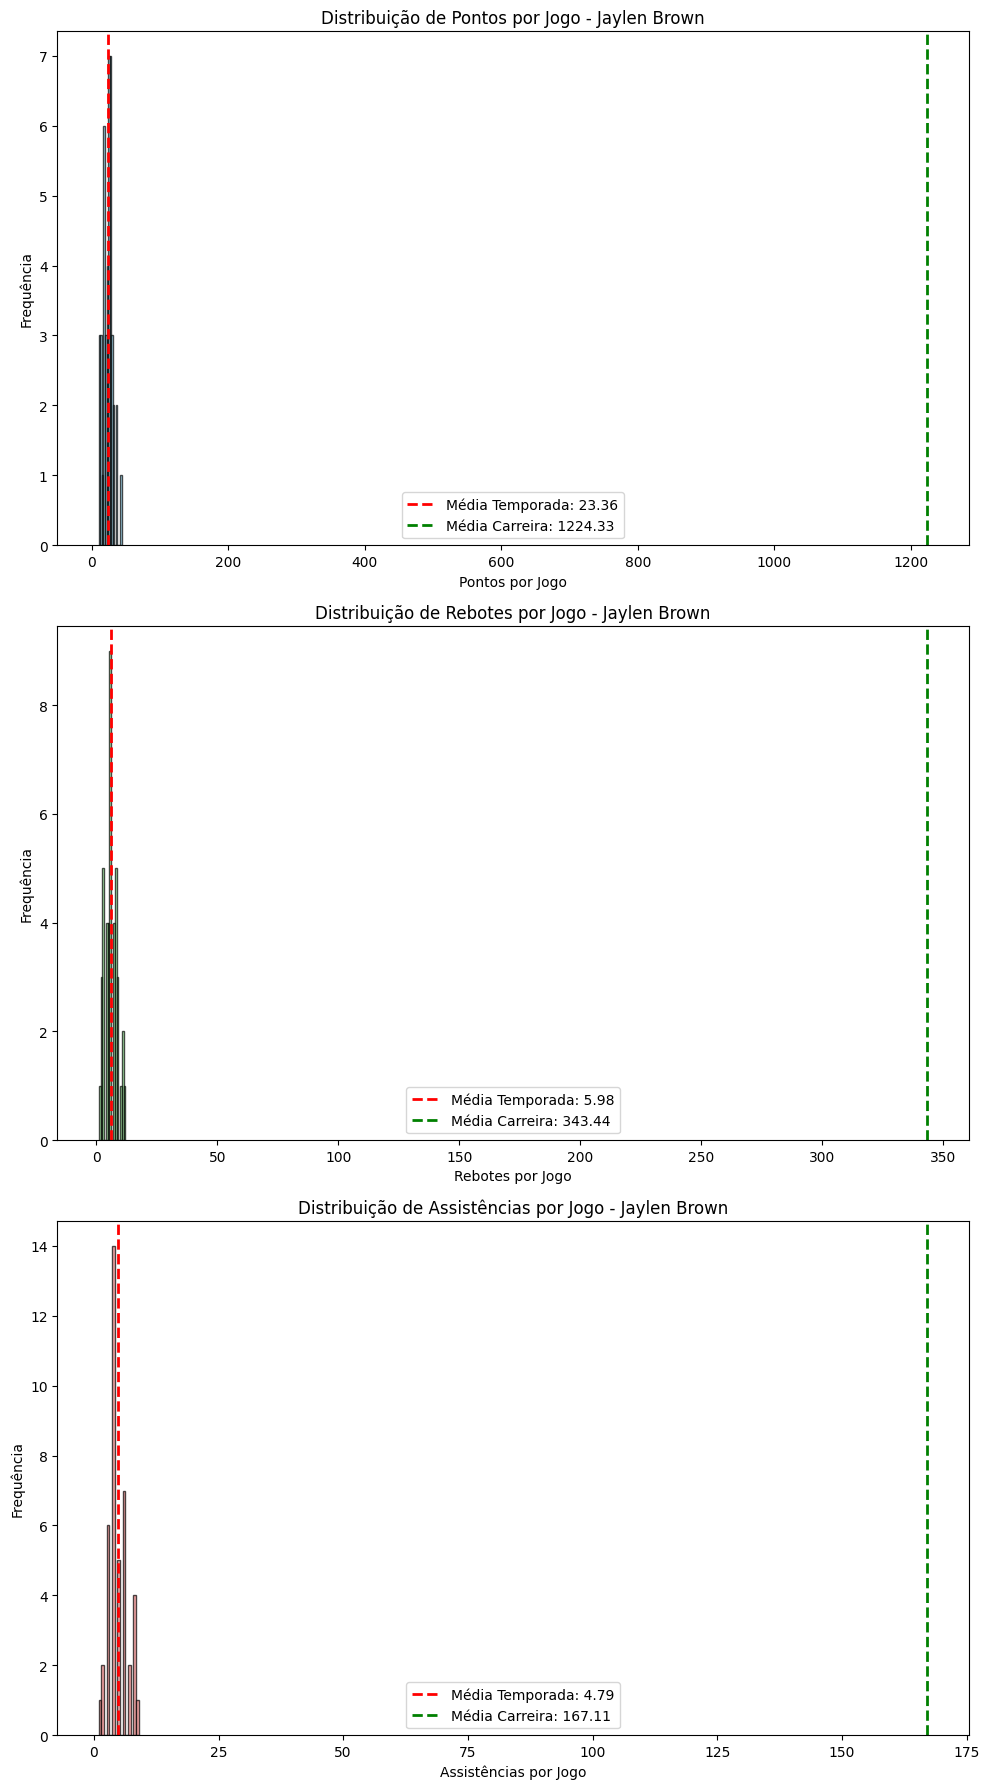

C:\Users\Pikachu\AppData\Local\Temp\ipykernel_15268\1975794354.py:94: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=False, patch_artist=True,


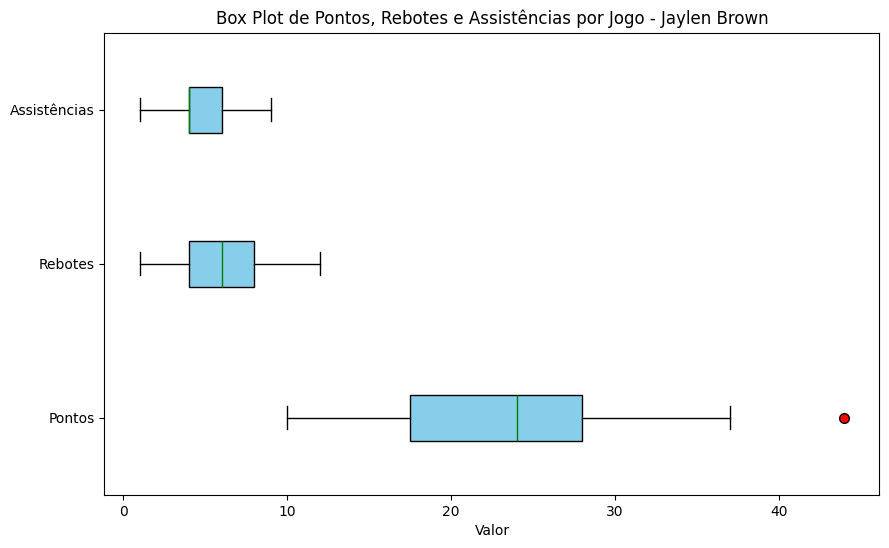

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nba_api.stats.endpoints import playergamelog, playercareerstats
from nba_api.stats.static import players
import pandas as pd
from scipy import stats

def get_player_id(player_name):
    player_dict = players.get_players()
    player_data = [player for player in player_dict if player['full_name'] == player_name]
    if player_data:
        return player_data[0]['id']
    else:
        raise ValueError(f"Jogador {player_name} não encontrado.")

def get_player_stats_comparison_and_plots(player_name):
    try:
        player_id = get_player_id(player_name)
        
        # Obtendo os logs de todos os jogos do jogador para a temporada atual
        player_game_log_season = playergamelog.PlayerGameLog(player_id=player_id, season="2024")
        games_season = player_game_log_season.get_data_frames()[0]
        
        if games_season.empty:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
            return None
        
        # Total de jogos e estatísticas da temporada atual
        total_games_season = len(games_season)
        avg_points_season = games_season['PTS'].mean()
        avg_rebounds_season = games_season['REB'].mean()
        avg_assists_season = games_season['AST'].mean()
        avg_minutes_season = games_season['MIN'].mean()
        
        # Obtendo as estatísticas de toda a carreira do jogador
        player_career_stats = playercareerstats.PlayerCareerStats(player_id=player_id)
        career_data = player_career_stats.get_data_frames()[0]
        
        # Cálculo da média de pontos, rebotes, assistências e minutos para toda a carreira
        total_games_career = career_data['GP'].sum()  # Somando os jogos para obter o total correto
        avg_points_career = career_data['PTS'].mean()
        avg_rebounds_career = career_data['REB'].mean()
        avg_assists_career = career_data['AST'].mean()
        avg_minutes_career = career_data['MIN'].mean()

        # Exibindo comparação de dados na tabela
        print(f"Comparação entre Temporada Atual e Carreira de {player_name}:")
        print(f"{'Estatísticas':<25} {'Temporada Atual':<15} {'Carreira'}")
        print("-" * 60)
        print(f"Total de Jogos            {total_games_season:<15} {total_games_career}")
        print(f"Média de Pontos           {avg_points_season:<15.2f} {avg_points_career:<.2f}")
        print(f"Média de Assistências     {avg_assists_season:<15.2f} {avg_assists_career:<.2f}")
        print(f"Média de Rebotes          {avg_rebounds_season:<15.2f} {avg_rebounds_career:<.2f}")
        print(f"Minutos em Quadra         {avg_minutes_season:<15.2f} {avg_minutes_career:<.2f}")
        
        # Gráfico de distribuição de pontos, rebotes e assistências com média
        fig, axs = plt.subplots(3, 1, figsize=(10, 18))
        
        # Gráfico de distribuição de pontos
        axs[0].hist(games_season['PTS'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
        axs[0].axvline(avg_points_season, color='r', linestyle='dashed', linewidth=2, label=f'Média Temporada: {avg_points_season:.2f}')
        axs[0].axvline(avg_points_career, color='g', linestyle='dashed', linewidth=2, label=f'Média Carreira: {avg_points_career:.2f}')
        axs[0].set_title(f'Distribuição de Pontos por Jogo - {player_name}')
        axs[0].set_xlabel('Pontos por Jogo')
        axs[0].set_ylabel('Frequência')
        axs[0].legend()
        
        # Gráfico de distribuição de rebotes
        axs[1].hist(games_season['REB'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
        axs[1].axvline(avg_rebounds_season, color='r', linestyle='dashed', linewidth=2, label=f'Média Temporada: {avg_rebounds_season:.2f}')
        axs[1].axvline(avg_rebounds_career, color='g', linestyle='dashed', linewidth=2, label=f'Média Carreira: {avg_rebounds_career:.2f}')
        axs[1].set_title(f'Distribuição de Rebotes por Jogo - {player_name}')
        axs[1].set_xlabel('Rebotes por Jogo')
        axs[1].set_ylabel('Frequência')
        axs[1].legend()
        
        # Gráfico de distribuição de assistências
        axs[2].hist(games_season['AST'], bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
        axs[2].axvline(avg_assists_season, color='r', linestyle='dashed', linewidth=2, label=f'Média Temporada: {avg_assists_season:.2f}')
        axs[2].axvline(avg_assists_career, color='g', linestyle='dashed', linewidth=2, label=f'Média Carreira: {avg_assists_career:.2f}')
        axs[2].set_title(f'Distribuição de Assistências por Jogo - {player_name}')
        axs[2].set_xlabel('Assistências por Jogo')
        axs[2].set_ylabel('Frequência')
        axs[2].legend()
        
        # Exibir gráficos
        plt.tight_layout()
        plt.show()
        
        # Gráfico Box Plot de pontos, rebotes e assistências por jogo
        plt.figure(figsize=(10, 6))
        data = [games_season['PTS'], games_season['REB'], games_season['AST']]
        plt.boxplot(data, vert=False, patch_artist=True, 
                    labels=['Pontos', 'Rebotes', 'Assistências'],
                    boxprops=dict(facecolor='skyblue', color='black'),
                    flierprops=dict(markerfacecolor='red', marker='o', markersize=7),
                    medianprops=dict(color='green'))
        plt.title(f'Box Plot de Pontos, Rebotes e Assistências por Jogo - {player_name}')
        plt.xlabel('Valor')
        plt.show()
    
    except ValueError as e:
        print(e)

# Estatísticas dos jogadores específicos
for player in ['Jayson Tatum', 'Derrick White', 'Jaylen Brown']:
    get_player_stats_comparison_and_plots(player)


### **R11: Salvando dados em um arquivo c.v.**

In [28]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.static import players as nba_players  # Renomeado para evitar conflito
import pandas as pd

# Função para obter o ID do jogador
def get_player_id(player_name):
    player_dict = nba_players.get_players()  # Usando o alias nba_players
    player_data = [player for player in player_dict if player['full_name'] == player_name]
    if player_data:
        return player_data[0]['id']
    else:
        raise ValueError(f"Jogador {player_name} não encontrado.")

# Função para coletar e calcular as estatísticas dos jogadores
def get_player_stats(player_name):
    try:
        player_id = get_player_id(player_name)
        player_game_log = playergamelog.PlayerGameLog(player_id=player_id, season="2024")
        games = player_game_log.get_data_frames()[0]
        
        if games.empty:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
            return None
        
        # RF1: Média de pontos
        avg_points = games['PTS'].mean()
        
        # RF2: Média de rebotes
        avg_rebounds = games['REB'].mean()
        
        # RF3: Média de assistências
        avg_assists = games['AST'].mean()
        
        # RF4: Porcentagem de jogos abaixo da média
        below_avg_pts = (games['PTS'] < avg_points).mean() * 100
        below_avg_reb = (games['REB'] < avg_rebounds).mean() * 100
        below_avg_ast = (games['AST'] < avg_assists).mean() * 100
        
        # RF5: Médias de pontos, rebotes e assistências
        print(f"Médias de {player_name} na temporada:")
        print(f"  PTS={avg_points:.2f}")
        print(f"  REB={avg_rebounds:.2f}")
        print(f"  AST={avg_assists:.2f}")
        
        print(f"Porcentagem de jogos abaixo da média:")
        print(f"  PTS={below_avg_pts:.2f}%")
        print(f"  REB={below_avg_reb:.2f}%")
        print(f"  AST={below_avg_ast:.2f}%")
        
        # RF6: Mediana de pontos, rebotes e assistências
        median_points = games['PTS'].median()
        median_rebounds = games['REB'].median()
        median_assists = games['AST'].median()
        
        below_median_pts = (games['PTS'] < median_points).mean() * 100
        below_median_reb = (games['REB'] < median_rebounds).mean() * 100
        below_median_ast = (games['AST'] < median_assists).mean() * 100
        
        print(f"Medianas de {player_name} na temporada:")
        print(f"  PTS={median_points:.2f}")
        print(f"  REB={median_rebounds:.2f}")
        print(f"  AST={median_assists:.2f}")
        
        print(f"Porcentagem de jogos abaixo da mediana:")
        print(f"  PTS={below_median_pts:.2f}%")
        print(f"  REB={below_median_reb:.2f}%")
        print(f"  AST={below_median_ast:.2f}%")
        
        # RF7: Moda de pontos, rebotes e assistências
        mode_points = games['PTS'].mode()[0]
        mode_rebounds = games['REB'].mode()[0]
        mode_assists = games['AST'].mode()[0]
        
        mode_points_count = (games['PTS'] == mode_points).sum()
        mode_rebounds_count = (games['REB'] == mode_rebounds).sum()
        mode_assists_count = (games['AST'] == mode_assists).sum()
        
        print(f"Moda de {player_name} na temporada:")
        print(f"  PTS={mode_points}, apareceu {mode_points_count} vezes")
        print(f"  REB={mode_rebounds}, apareceu {mode_rebounds_count} vezes")
        print(f"  AST={mode_assists}, apareceu {mode_assists_count} vezes")
        
        # RF8: Desvio Padrão de pontos, rebotes e assistências
        std_points = games['PTS'].std()
        std_rebounds = games['REB'].std()
        std_assists = games['AST'].std()
        
        print(f"Desvio Padrão de {player_name} na temporada:")
        print(f"  PTS={std_points:.2f}")
        print(f"  REB={std_rebounds:.2f}")
        print(f"  AST={std_assists:.2f}")
        
        # RF11: Salvar as estatísticas em um arquivo CSV
        stats = {
            'Jogador': player_name,
            'Média PTS': avg_points,
            'Média REB': avg_rebounds,
            'Média AST': avg_assists,
            'Porcentagem abaixo da média PTS': below_avg_pts,
            'Porcentagem abaixo da média REB': below_avg_reb,
            'Porcentagem abaixo da média AST': below_avg_ast,
            'Mediana PTS': median_points,
            'Mediana REB': median_rebounds,
            'Mediana AST': median_assists,
            'Porcentagem abaixo da mediana PTS': below_median_pts,
            'Porcentagem abaixo da mediana REB': below_median_reb,
            'Porcentagem abaixo da mediana AST': below_median_ast,
            'Moda PTS': mode_points,
            'Moda REB': mode_rebounds,
            'Moda AST': mode_assists,
            'Contagem da Moda PTS': mode_points_count,
            'Contagem da Moda REB': mode_rebounds_count,
            'Contagem da Moda AST': mode_assists_count,
            'Desvio Padrão PTS': std_points,
            'Desvio Padrão REB': std_rebounds,
            'Desvio Padrão AST': std_assists
        }
        
        # Criar um DataFrame e salvar em um arquivo CSV
        stats_df = pd.DataFrame([stats])
        stats_df.to_csv('player_stats.csv', mode='a', header=not pd.io.common.file_exists('player_stats.csv'), index=False)
        
        print("\nAs estatísticas foram salvas no arquivo 'player_stats.csv'.")
    
    except ValueError as e:
        print(e)

# Estatísticas dos jogadores específicos
for player in ['Jayson Tatum', 'Derrick White', 'Jaylen Brown']:
    get_player_stats(player)


Médias de Jayson Tatum na temporada:
  PTS=26.67
  REB=8.89
  AST=5.54
Porcentagem de jogos abaixo da média:
  PTS=50.00%
  REB=47.83%
  AST=54.35%
Medianas de Jayson Tatum na temporada:
  PTS=26.50
  REB=9.00
  AST=5.00
Porcentagem de jogos abaixo da mediana:
  PTS=50.00%
  REB=47.83%
  AST=41.30%
Moda de Jayson Tatum na temporada:
  PTS=16, apareceu 4 vezes
  REB=6, apareceu 8 vezes
  AST=4, apareceu 10 vezes
Desvio Padrão de Jayson Tatum na temporada:
  PTS=7.36
  REB=2.89
  AST=2.53

As estatísticas foram salvas no arquivo 'player_stats.csv'.
Médias de Derrick White na temporada:
  PTS=16.07
  REB=4.28
  AST=4.11
Porcentagem de jogos abaixo da média:
  PTS=47.83%
  REB=60.87%
  AST=65.22%
Medianas de Derrick White na temporada:
  PTS=17.00
  REB=4.00
  AST=4.00
Porcentagem de jogos abaixo da mediana:
  PTS=47.83%
  REB=36.96%
  AST=41.30%
Moda de Derrick White na temporada:
  PTS=19, apareceu 5 vezes
  REB=4, apareceu 11 vezes
  AST=4, apareceu 11 vezes
Desvio Padrão de Derrick Whi

### **R12: Exibindo gráficos no Browser**

Comparação entre Temporada Atual e Carreira de Jayson Tatum:
Estatísticas              Temporada Atual Carreira
------------------------------------------------------------
Total de Jogos            46              559
Média de Pontos           26.67           1634.88
Média de Assistências     5.54            258.38
Média de Rebotes          8.89            509.88
Minutos em Quadra         36.33           2404.12
Gráfico de Distribuição salvo como distribution_plot_Jayson Tatum.png


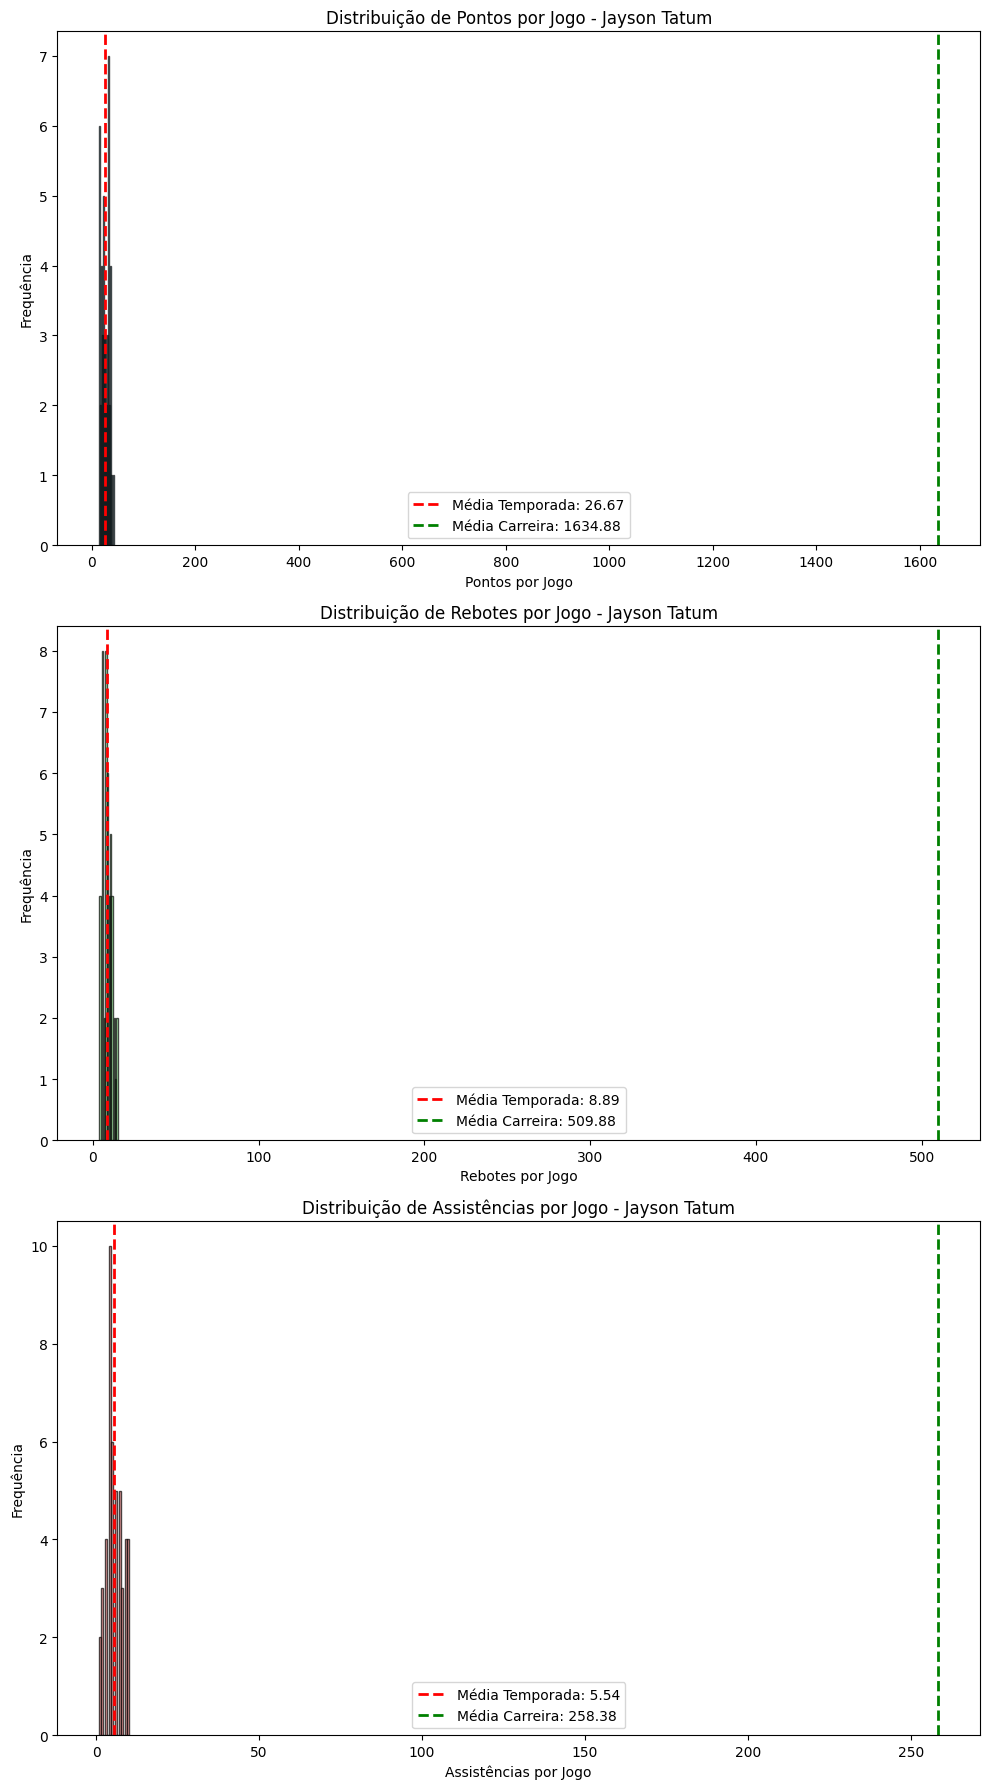

C:\Users\Pikachu\AppData\Local\Temp\ipykernel_15268\928387479.py:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=False, patch_artist=True,


Gráfico Box Plot salvo como box_plot_Jayson Tatum.png
Comparação entre Temporada Atual e Carreira de Derrick White:
Estatísticas              Temporada Atual Carreira
------------------------------------------------------------
Total de Jogos            46              539
Média de Pontos           16.07           688.20
Média de Assistências     4.11            225.90
Média de Rebotes          4.28            192.50
Minutos em Quadra         33.70           1525.90
Gráfico de Distribuição salvo como distribution_plot_Derrick White.png


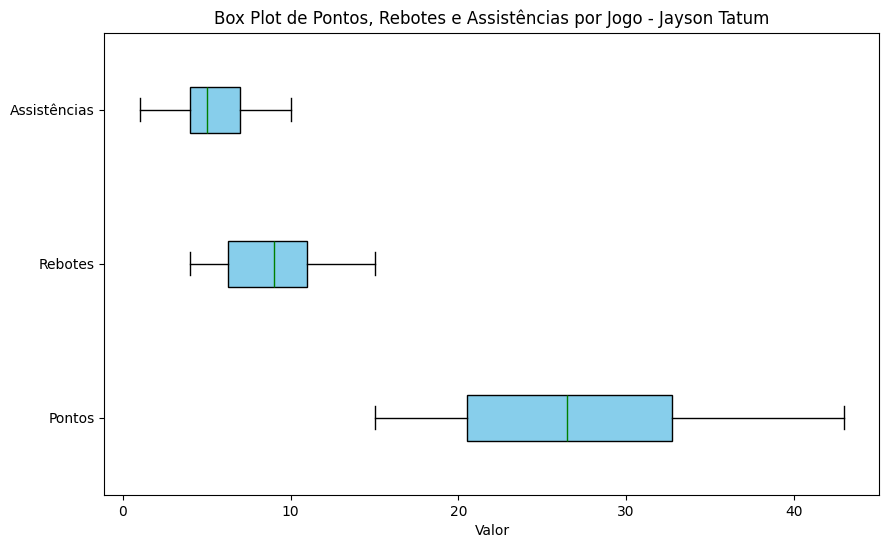

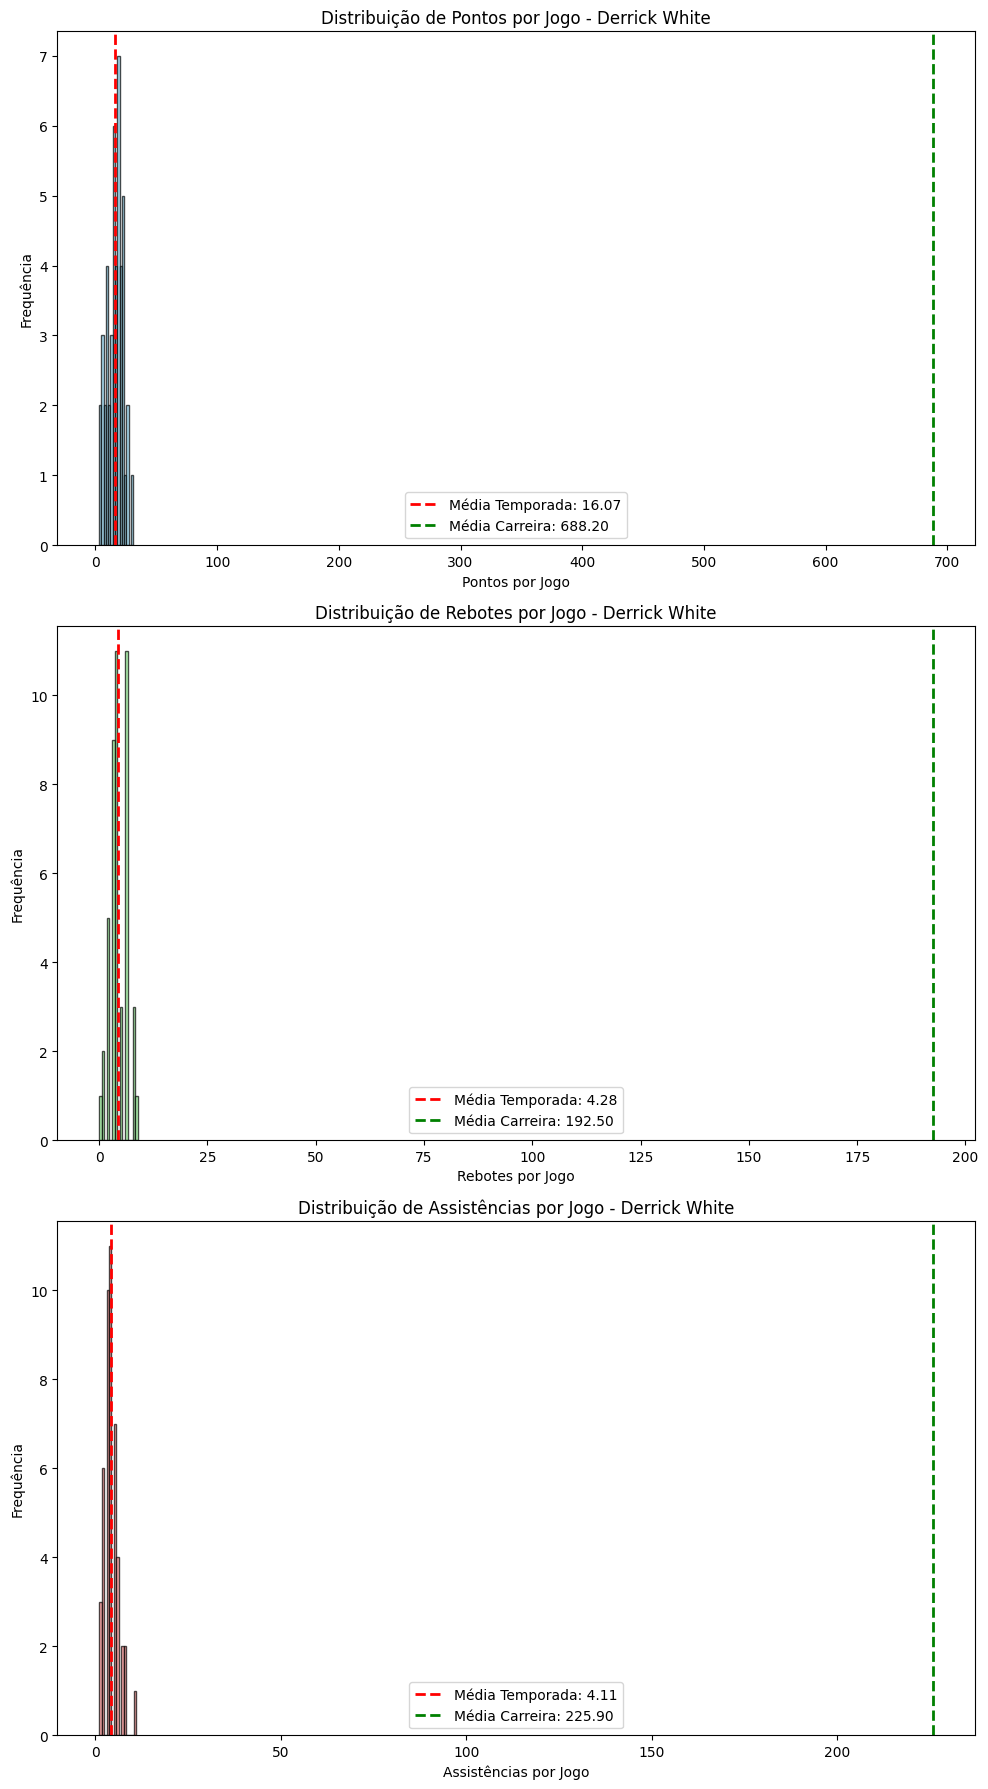

C:\Users\Pikachu\AppData\Local\Temp\ipykernel_15268\928387479.py:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=False, patch_artist=True,


Gráfico Box Plot salvo como box_plot_Derrick White.png
Comparação entre Temporada Atual e Carreira de Jaylen Brown:
Estatísticas              Temporada Atual Carreira
------------------------------------------------------------
Total de Jogos            42              582
Média de Pontos           23.36           1224.33
Média de Assistências     4.79            167.11
Média de Rebotes          5.98            343.44
Minutos em Quadra         35.48           1977.33
Gráfico de Distribuição salvo como distribution_plot_Jaylen Brown.png


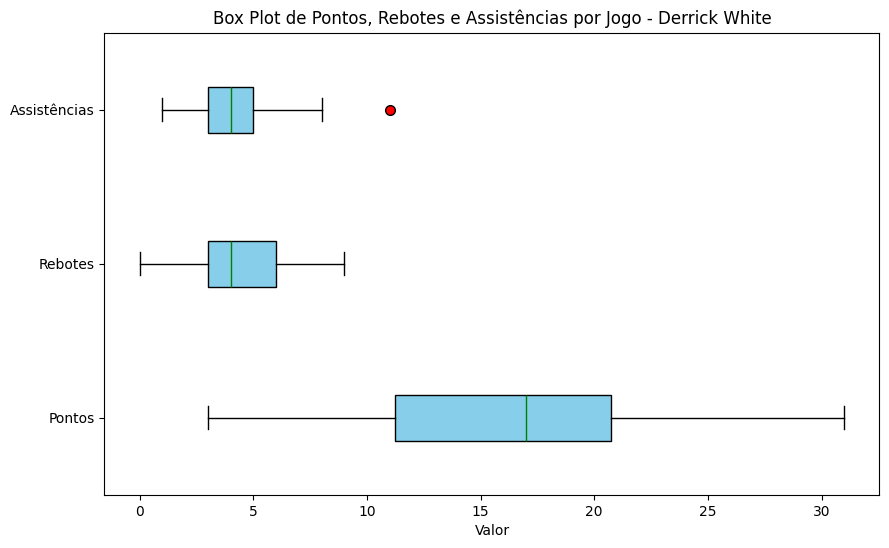

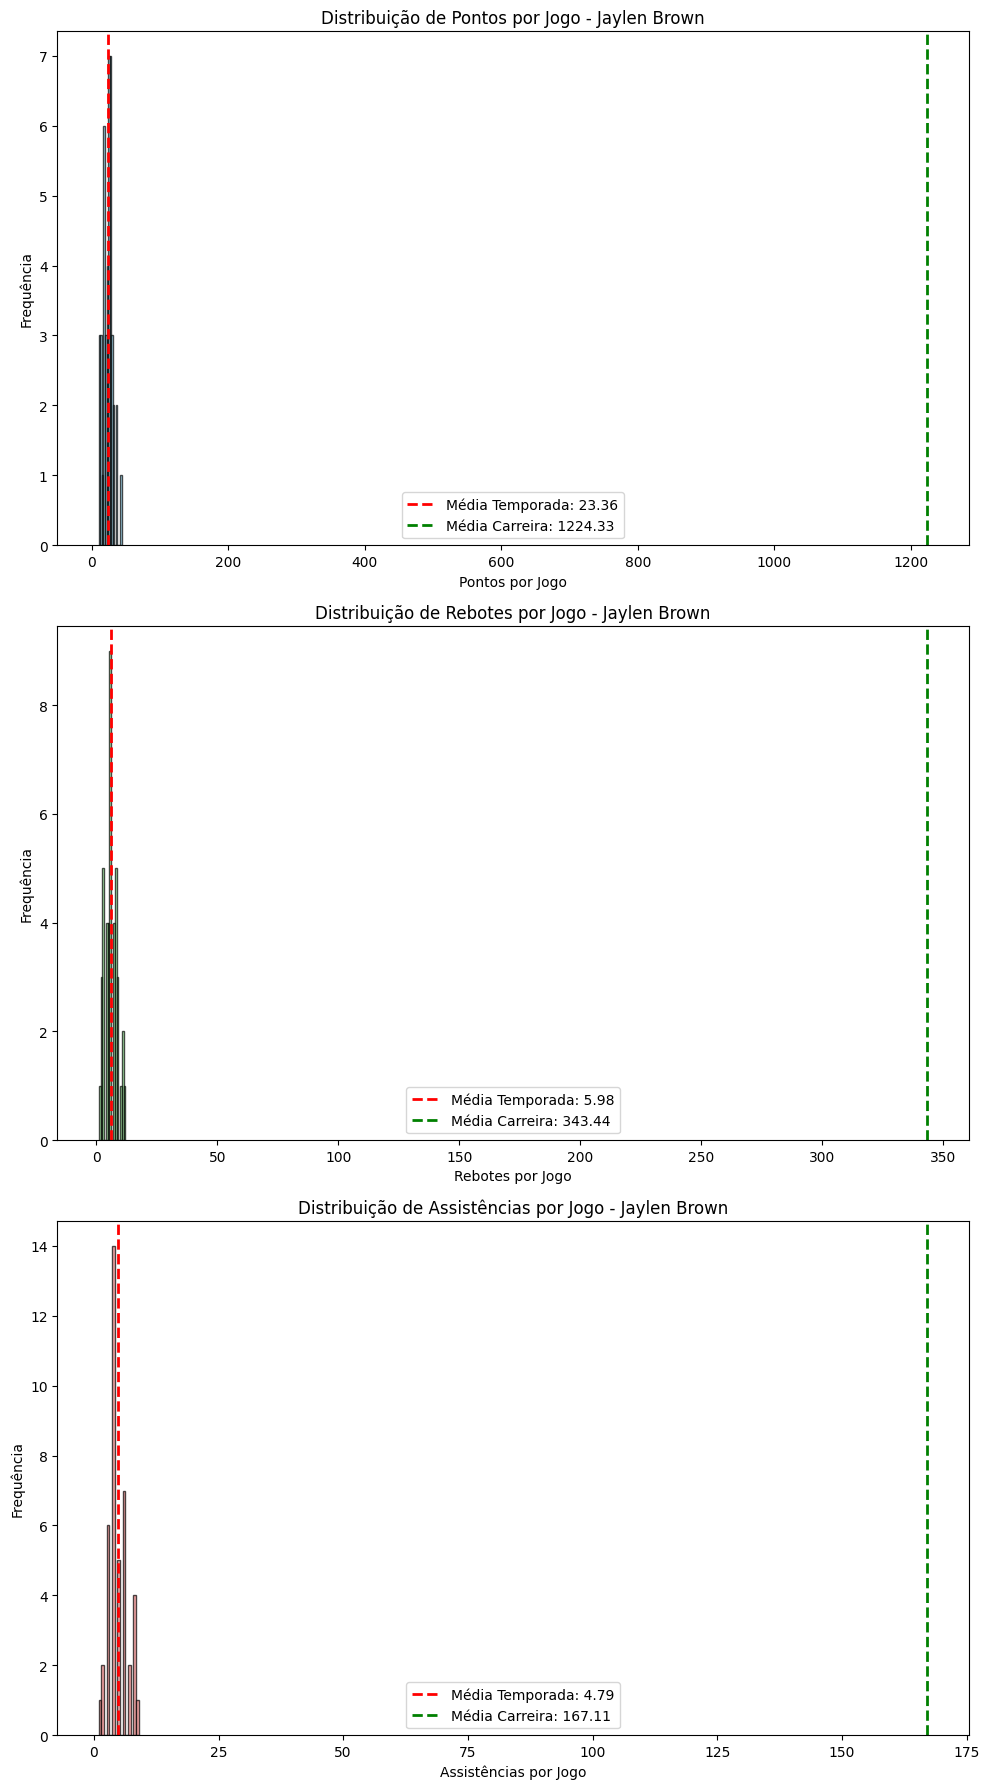

C:\Users\Pikachu\AppData\Local\Temp\ipykernel_15268\928387479.py:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=False, patch_artist=True,


Gráfico Box Plot salvo como box_plot_Jaylen Brown.png


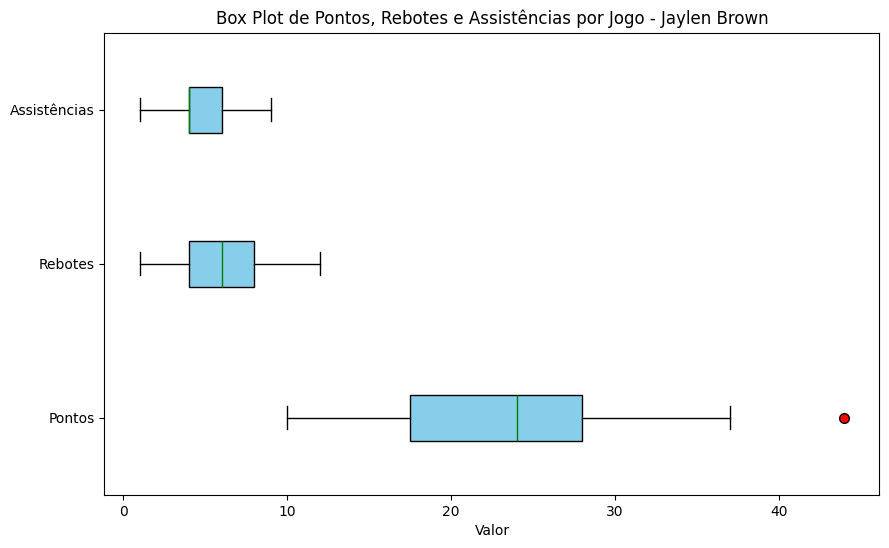

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nba_api.stats.endpoints import playergamelog, playercareerstats
from nba_api.stats.static import players
import pandas as pd
from scipy import stats
import os
import webbrowser

def get_player_id(player_name):
    player_dict = players.get_players()
    player_data = [player for player in player_dict if player['full_name'] == player_name]
    if player_data:
        return player_data[0]['id']
    else:
        raise ValueError(f"Jogador {player_name} não encontrado.")

def get_player_stats_comparison_and_plots(player_name):
    try:
        player_id = get_player_id(player_name)
        
        # Obtendo os logs de todos os jogos do jogador para a temporada atual
        player_game_log_season = playergamelog.PlayerGameLog(player_id=player_id, season="2024")
        games_season = player_game_log_season.get_data_frames()[0]
        
        if games_season.empty:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
            return None
        
        # Total de jogos e estatísticas da temporada atual
        total_games_season = len(games_season)
        avg_points_season = games_season['PTS'].mean()
        avg_rebounds_season = games_season['REB'].mean()
        avg_assists_season = games_season['AST'].mean()
        avg_minutes_season = games_season['MIN'].mean()
        
        # Obtendo as estatísticas de toda a carreira do jogador
        player_career_stats = playercareerstats.PlayerCareerStats(player_id=player_id)
        career_data = player_career_stats.get_data_frames()[0]
        
        # Cálculo da média de pontos, rebotes, assistências e minutos para toda a carreira
        total_games_career = career_data['GP'].sum()  # Somando os jogos para obter o total correto
        avg_points_career = career_data['PTS'].mean()
        avg_rebounds_career = career_data['REB'].mean()
        avg_assists_career = career_data['AST'].mean()
        avg_minutes_career = career_data['MIN'].mean()

        # Exibindo comparação de dados na tabela
        print(f"Comparação entre Temporada Atual e Carreira de {player_name}:")
        print(f"{'Estatísticas':<25} {'Temporada Atual':<15} {'Carreira'}")
        print("-" * 60)
        print(f"Total de Jogos            {total_games_season:<15} {total_games_career}")
        print(f"Média de Pontos           {avg_points_season:<15.2f} {avg_points_career:<.2f}")
        print(f"Média de Assistências     {avg_assists_season:<15.2f} {avg_assists_career:<.2f}")
        print(f"Média de Rebotes          {avg_rebounds_season:<15.2f} {avg_rebounds_career:<.2f}")
        print(f"Minutos em Quadra         {avg_minutes_season:<15.2f} {avg_minutes_career:<.2f}")
        
        # Gráfico de distribuição de pontos, rebotes e assistências com média
        fig, axs = plt.subplots(3, 1, figsize=(10, 18))
        
        # Gráfico de distribuição de pontos
        axs[0].hist(games_season['PTS'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
        axs[0].axvline(avg_points_season, color='r', linestyle='dashed', linewidth=2, label=f'Média Temporada: {avg_points_season:.2f}')
        axs[0].axvline(avg_points_career, color='g', linestyle='dashed', linewidth=2, label=f'Média Carreira: {avg_points_career:.2f}')
        axs[0].set_title(f'Distribuição de Pontos por Jogo - {player_name}')
        axs[0].set_xlabel('Pontos por Jogo')
        axs[0].set_ylabel('Frequência')
        axs[0].legend()
        
        # Gráfico de distribuição de rebotes
        axs[1].hist(games_season['REB'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
        axs[1].axvline(avg_rebounds_season, color='r', linestyle='dashed', linewidth=2, label=f'Média Temporada: {avg_rebounds_season:.2f}')
        axs[1].axvline(avg_rebounds_career, color='g', linestyle='dashed', linewidth=2, label=f'Média Carreira: {avg_rebounds_career:.2f}')
        axs[1].set_title(f'Distribuição de Rebotes por Jogo - {player_name}')
        axs[1].set_xlabel('Rebotes por Jogo')
        axs[1].set_ylabel('Frequência')
        axs[1].legend()
        
        # Gráfico de distribuição de assistências
        axs[2].hist(games_season['AST'], bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
        axs[2].axvline(avg_assists_season, color='r', linestyle='dashed', linewidth=2, label=f'Média Temporada: {avg_assists_season:.2f}')
        axs[2].axvline(avg_assists_career, color='g', linestyle='dashed', linewidth=2, label=f'Média Carreira: {avg_assists_career:.2f}')
        axs[2].set_title(f'Distribuição de Assistências por Jogo - {player_name}')
        axs[2].set_xlabel('Assistências por Jogo')
        axs[2].set_ylabel('Frequência')
        axs[2].legend()
        
        # Exibir gráficos
        plt.tight_layout()
        
        # Salvar o gráfico como imagem PNG
        plot_filename = f"distribution_plot_{player_name}.png"
        plt.savefig(plot_filename)
        print(f"Gráfico de Distribuição salvo como {plot_filename}")
        
        # Abrir no navegador
        webbrowser.open(f"file://{os.path.realpath(plot_filename)}")
        
        plt.show()
        
        # Gráfico Box Plot de pontos, rebotes e assistências por jogo
        plt.figure(figsize=(10, 6))
        data = [games_season['PTS'], games_season['REB'], games_season['AST']]
        plt.boxplot(data, vert=False, patch_artist=True, 
                    labels=['Pontos', 'Rebotes', 'Assistências'],
                    boxprops=dict(facecolor='skyblue', color='black'),
                    flierprops=dict(markerfacecolor='red', marker='o', markersize=7),
                    medianprops=dict(color='green'))
        plt.title(f'Box Plot de Pontos, Rebotes e Assistências por Jogo - {player_name}')
        plt.xlabel('Valor')
        
        # Salvar o gráfico Box Plot como imagem PNG
        box_plot_filename = f"box_plot_{player_name}.png"
        plt.savefig(box_plot_filename)
        print(f"Gráfico Box Plot salvo como {box_plot_filename}")
        
        # Abrir no navegador
        webbrowser.open(f"file://{os.path.realpath(box_plot_filename)}")
    
    except ValueError as e:
        print(e)

# Estatísticas dos jogadores específicos
for player in ['Jayson Tatum', 'Derrick White', 'Jaylen Brown']:
    get_player_stats_comparison_and_plots(player)


## **PARTE 3**

### **RF1 - Probabilidades de pontos, rebotes, assistências, etc...**


In [60]:
import numpy as np

def prob_above(data, x):
    return np.mean(data > x)

def prob_at_least(data, x):
    return np.mean(data >= x)

def prob_at_most(data, x):
    return np.mean(data <= x)

def prop_less_equal(data, x):
    return np.mean(data <= x)

def values_less_than(data, x):
    return data[data < x]

def prop_less_than(data, x):
    return np.mean(data < x)

# Dados dos jogadores
jayson_tatum_pts = np.random.normal(26.67, 7.36, 100) 
jayson_tatum_reb = np.random.normal(8.89, 2.89, 100)
jayson_tatum_ast = np.random.normal(5.54, 2.53, 100)

derrick_white_pts = np.random.normal(16.07, 6.44, 100)
derrick_white_reb = np.random.normal(4.28, 2.00, 100)
derrick_white_ast = np.random.normal(4.11, 2.01, 100)

jaylen_brown_pts = np.random.normal(23.36, 7.19, 100)
jaylen_brown_reb = np.random.normal(5.98, 2.66, 100)
jaylen_brown_ast = np.random.normal(4.79, 1.83, 100)

X_pts = 20
X_reb = 5
X_ast = 5

# Jayson Tatum
print("Jayson Tatum:")
print(f"Probabilidade de marcar acima de {X_pts} pontos: {prob_above(jayson_tatum_pts, X_pts):.2f}")
print(f"Probabilidade de atingir ou exceder {X_pts} pontos: {prob_at_least(jayson_tatum_pts, X_pts):.2f}")
print(f"Probabilidade de atingir ou ficar abaixo de {X_pts} pontos: {prob_at_most(jayson_tatum_pts, X_pts):.2f}")
print(f"Proporção de valores menores ou iguais a {X_pts} pontos: {prop_less_equal(jayson_tatum_pts, X_pts):.2f}")
print(f"Valores menores que {X_pts} pontos: {values_less_than(jayson_tatum_pts, X_pts)}")
print(f"Proporção de valores menores que {X_pts} pontos: {prop_less_than(jayson_tatum_pts, X_pts):.2f}")

print(f"Probabilidade de pegar acima de {X_reb} rebotes: {prob_above(jayson_tatum_reb, X_reb):.2f}")
print(f"Probabilidade de atingir ou exceder {X_reb} rebotes: {prob_at_least(jayson_tatum_reb, X_reb):.2f}")
print(f"Probabilidade de atingir ou ficar abaixo de {X_reb} rebotes: {prob_at_most(jayson_tatum_reb, X_reb):.2f}")
print(f"Proporção de valores menores ou iguais a {X_reb} rebotes: {prop_less_equal(jayson_tatum_reb, X_reb):.2f}")
print(f"Valores menores que {X_reb} rebotes: {values_less_than(jayson_tatum_reb, X_reb)}")
print(f"Proporção de valores menores que {X_reb} rebotes: {prop_less_than(jayson_tatum_reb, X_reb):.2f}")

print(f"Probabilidade de dar acima de {X_ast} assistências: {prob_above(jayson_tatum_ast, X_ast):.2f}")
print(f"Probabilidade de atingir ou exceder {X_ast} assistências: {prob_at_least(jayson_tatum_ast, X_ast):.2f}")
print(f"Probabilidade de atingir ou ficar abaixo de {X_ast} assistências: {prob_at_most(jayson_tatum_ast, X_ast):.2f}")
print(f"Proporção de valores menores ou iguais a {X_ast} assistências: {prop_less_equal(jayson_tatum_ast, X_ast):.2f}")
print(f"Valores menores que {X_ast} assistências: {values_less_than(jayson_tatum_ast, X_ast)}")
print(f"Proporção de valores menores que {X_ast} assistências: {prop_less_than(jayson_tatum_ast, X_ast):.2f}")

# Derrick White
print("\nDerrick White:")
print(f"Probabilidade de marcar acima de {X_pts} pontos: {prob_above(derrick_white_pts, X_pts):.2f}")
print(f"Probabilidade de atingir ou exceder {X_pts} pontos: {prob_at_least(derrick_white_pts, X_pts):.2f}")
print(f"Probabilidade de atingir ou ficar abaixo de {X_pts} pontos: {prob_at_most(derrick_white_pts, X_pts):.2f}")
print(f"Proporção de valores menores ou iguais a {X_pts} pontos: {prop_less_equal(derrick_white_pts, X_pts):.2f}")
print(f"Valores menores que {X_pts} pontos: {values_less_than(derrick_white_pts, X_pts)}")
print(f"Proporção de valores menores que {X_pts} pontos: {prop_less_than(derrick_white_pts, X_pts):.2f}")

print(f"Probabilidade de pegar acima de {X_reb} rebotes: {prob_above(derrick_white_reb, X_reb):.2f}")
print(f"Probabilidade de atingir ou exceder {X_reb} rebotes: {prob_at_least(derrick_white_reb, X_reb):.2f}")
print(f"Probabilidade de atingir ou ficar abaixo de {X_reb} rebotes: {prob_at_most(derrick_white_reb, X_reb):.2f}")
print(f"Proporção de valores menores ou iguais a {X_reb} rebotes: {prop_less_equal(derrick_white_reb, X_reb):.2f}")
print(f"Valores menores que {X_reb} rebotes: {values_less_than(derrick_white_reb, X_reb)}")
print(f"Proporção de valores menores que {X_reb} rebotes: {prop_less_than(derrick_white_reb, X_reb):.2f}")

print(f"Probabilidade de dar acima de {X_ast} assistências: {prob_above(derrick_white_ast, X_ast):.2f}")
print(f"Probabilidade de atingir ou exceder {X_ast} assistências: {prob_at_least(derrick_white_ast, X_ast):.2f}")
print(f"Probabilidade de atingir ou ficar abaixo de {X_ast} assistências: {prob_at_most(derrick_white_ast, X_ast):.2f}")
print(f"Proporção de valores menores ou iguais a {X_ast} assistências: {prop_less_equal(derrick_white_ast, X_ast):.2f}")
print(f"Valores menores que {X_ast} assistências: {values_less_than(derrick_white_ast, X_ast)}")
print(f"Proporção de valores menores que {X_ast} assistências: {prop_less_than(derrick_white_ast, X_ast):.2f}")

# Jaylen Brown
print("\nJaylen Brown:")
print(f"Probabilidade de marcar acima de {X_pts} pontos: {prob_above(jaylen_brown_pts, X_pts):.2f}")
print(f"Probabilidade de atingir ou exceder {X_pts} pontos: {prob_at_least(jaylen_brown_pts, X_pts):.2f}")
print(f"Probabilidade de atingir ou ficar abaixo de {X_pts} pontos: {prob_at_most(jaylen_brown_pts, X_pts):.2f}")
print(f"Proporção de valores menores ou iguais a {X_pts} pontos: {prop_less_equal(jaylen_brown_pts, X_pts):.2f}")
print(f"Valores menores que {X_pts} pontos: {values_less_than(jaylen_brown_pts, X_pts)}")
print(f"Proporção de valores menores que {X_pts} pontos: {prop_less_than(jaylen_brown_pts, X_pts):.2f}")

print(f"Probabilidade de pegar acima de {X_reb} rebotes: {prob_above(jaylen_brown_reb, X_reb):.2f}")
print(f"Probabilidade de atingir ou exceder {X_reb} rebotes: {prob_at_least(jaylen_brown_reb, X_reb):.2f}")
print(f"Probabilidade de atingir ou ficar abaixo de {X_reb} rebotes: {prob_at_most(jaylen_brown_reb, X_reb):.2f}")
print(f"Proporção de valores menores ou iguais a {X_reb} rebotes: {prop_less_equal(jaylen_brown_reb, X_reb):.2f}")
print(f"Valores menores que {X_reb} rebotes: {values_less_than(jaylen_brown_reb, X_reb)}")
print(f"Proporção de valores menores que {X_reb} rebotes: {prop_less_than(jaylen_brown_reb, X_reb):.2f}")

print(f"Probabilidade de dar acima de {X_ast} assistências: {prob_above(jaylen_brown_ast, X_ast):.2f}")
print(f"Probabilidade de atingir ou exceder {X_ast} assistências: {prob_at_least(jaylen_brown_ast, X_ast):.2f}")
print(f"Probabilidade de atingir ou ficar abaixo de {X_ast} assistências: {prob_at_most(jaylen_brown_ast, X_ast):.2f}")
print(f"Proporção de valores menores ou iguais a {X_ast} assistências: {prop_less_equal(jaylen_brown_ast, X_ast):.2f}")
print(f"Valores menores que {X_ast} assistências: {values_less_than(jaylen_brown_ast, X_ast)}")
print(f"Proporção de valores menores que {X_ast} assistências: {prop_less_than(jaylen_brown_ast, X_ast):.2f}")


Jayson Tatum:
Probabilidade de marcar acima de 20 pontos: 0.76
Probabilidade de atingir ou exceder 20 pontos: 0.76
Probabilidade de atingir ou ficar abaixo de 20 pontos: 0.24
Proporção de valores menores ou iguais a 20 pontos: 0.24
Valores menores que 20 pontos: [19.69380052 12.18466521 14.0452476  13.73386022 18.75421391 19.1140426
 17.94199462 14.91950555 19.2583385  13.81535433 18.53152746 12.05679766
 14.98104701 16.92580501 19.66319994 11.16596326 11.61686791 19.02394598
 10.5122588  15.93221603 17.07308332 19.91868268 13.41569846 17.30430095]
Proporção de valores menores que 20 pontos: 0.24
Probabilidade de pegar acima de 5 rebotes: 0.89
Probabilidade de atingir ou exceder 5 rebotes: 0.89
Probabilidade de atingir ou ficar abaixo de 5 rebotes: 0.11
Proporção de valores menores ou iguais a 5 rebotes: 0.11
Valores menores que 5 rebotes: [ 4.49379411  2.86141276  1.93315663  4.23827626  4.00178997  4.14193479
  4.13475536  3.8367002   4.82495188  4.98409355 -2.22376129]
Proporção de 

### **RF2 - Gráficos da RF1**


In [63]:
import plotly.graph_objects as go
import plotly.express as px
import webbrowser
from pathlib import Path

html_output_dir = "html_output"
os.makedirs(html_output_dir, exist_ok=True)

def save_and_open_html(fig, filename):
    filepath = Path(html_output_dir) / filename
    fig.write_html(filepath)
    webbrowser.open(f"file://{filepath.resolve()}")

fig = go.Figure()

# Jayson Tatum
fig.add_trace(go.Histogram(x=jayson_tatum_pts, name='Jayson Tatum', opacity=0.75, marker_color='blue'))
fig.add_vline(x=X_pts, line=dict(color='red', dash='dash'), annotation_text=f'X = {X_pts}', annotation_position='top right')

# Derrick White
fig.add_trace(go.Histogram(x=derrick_white_pts, name='Derrick White', opacity=0.75, marker_color='green'))
fig.add_vline(x=X_pts, line=dict(color='red', dash='dash'), annotation_text=f'X = {X_pts}', annotation_position='top right')

# Jaylen Brown
fig.add_trace(go.Histogram(x=jaylen_brown_pts, name='Jaylen Brown', opacity=0.75, marker_color='orange'))
fig.add_vline(x=X_pts, line=dict(color='red', dash='dash'), annotation_text=f'X = {X_pts}', annotation_position='top right')

fig.update_layout(title='Distribuição de Pontos dos Jogadores', xaxis_title='Pontos', yaxis_title='Frequência', barmode='overlay')
save_and_open_html(fig, "distribution_points.html")

# Gráfico de Distribuição de Rebotes
fig = go.Figure()

# Jayson Tatum
fig.add_trace(go.Histogram(x=jayson_tatum_reb, name='Jayson Tatum', opacity=0.75, marker_color='blue'))
fig.add_vline(x=X_reb, line=dict(color='red', dash='dash'), annotation_text=f'X = {X_reb}', annotation_position='top right')

# Derrick White
fig.add_trace(go.Histogram(x=derrick_white_reb, name='Derrick White', opacity=0.75, marker_color='green'))
fig.add_vline(x=X_reb, line=dict(color='red', dash='dash'), annotation_text=f'X = {X_reb}', annotation_position='top right')

# Jaylen Brown
fig.add_trace(go.Histogram(x=jaylen_brown_reb, name='Jaylen Brown', opacity=0.75, marker_color='orange'))
fig.add_vline(x=X_reb, line=dict(color='red', dash='dash'), annotation_text=f'X = {X_reb}', annotation_position='top right')

fig.update_layout(title='Distribuição de Rebotes dos Jogadores', xaxis_title='Rebotes', yaxis_title='Frequência', barmode='overlay')
save_and_open_html(fig, "distribution_rebounds.html")

# Gráfico de Distribuição de Assistências
fig = go.Figure()

# Jayson Tatum
fig.add_trace(go.Histogram(x=jayson_tatum_ast, name='Jayson Tatum', opacity=0.75, marker_color='blue'))
fig.add_vline(x=X_ast, line=dict(color='red', dash='dash'), annotation_text=f'X = {X_ast}', annotation_position='top right')

# Derrick White
fig.add_trace(go.Histogram(x=derrick_white_ast, name='Derrick White', opacity=0.75, marker_color='green'))
fig.add_vline(x=X_ast, line=dict(color='red', dash='dash'), annotation_text=f'X = {X_ast}', annotation_position='top right')

# Jaylen Brown
fig.add_trace(go.Histogram(x=jaylen_brown_ast, name='Jaylen Brown', opacity=0.75, marker_color='orange'))
fig.add_vline(x=X_ast, line=dict(color='red', dash='dash'), annotation_text=f'X = {X_ast}', annotation_position='top right')

fig.update_layout(title='Distribuição de Assistências dos Jogadores', xaxis_title='Assistências', yaxis_title='Frequência', barmode='overlay')
save_and_open_html(fig, "distribution_assists.html")

### **RF3 - Variáveis Independentes**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import plotly.express as px
import webbrowser
from pathlib import Path

np.random.seed(0)

# Jayson Tatum
jayson_tatum_data = pd.DataFrame({
    'PTS': np.random.normal(26.67, 7.36, 100),
    'REB': np.random.normal(8.89, 2.89, 100),
    'AST': np.random.normal(5.54, 2.53, 100),
    'MIN': np.random.normal(35, 5, 100),
    'FGA': np.random.normal(20, 5, 100),
    'TO': np.random.normal(3, 1, 100)
})

# Derrick White
derrick_white_data = pd.DataFrame({
    'PTS': np.random.normal(16.07, 6.44, 100),
    'REB': np.random.normal(4.28, 2.00, 100),
    'AST': np.random.normal(4.11, 2.01, 100),
    'MIN': np.random.normal(30, 5, 100),
    'FGA': np.random.normal(15, 5, 100),
    'TO': np.random.normal(2, 1, 100)
})

# Jaylen Brown
jaylen_brown_data = pd.DataFrame({
    'PTS': np.random.normal(23.36, 7.19, 100),
    'REB': np.random.normal(5.98, 2.66, 100),
    'AST': np.random.normal(4.79, 1.83, 100),
    'MIN': np.random.normal(34, 5, 100),
    'FGA': np.random.normal(18, 5, 100),
    'TO': np.random.normal(2.5, 1, 100)
})

# Variáveis independentes e dependentes
X_features = ['MIN', 'FGA', 'TO']
y_features = ['PTS', 'REB', 'AST']

def apply_linear_regression(data, X_features, y_feature):
    X = data[X_features]
    y = data[y_feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    return model, X_test, y_test, y_pred

# Aplicar regressão linear aos dados dos jogadores
models = {}
for player, data in zip(['Jayson Tatum', 'Derrick White', 'Jaylen Brown'], [jayson_tatum_data, derrick_white_data, jaylen_brown_data]):
    models[player] = {}
    for y_feature in y_features:
        model, X_test, y_test, y_pred = apply_linear_regression(data, X_features, y_feature)
        models[player][y_feature] = {
            'model': model,
            'X_test': X_test,
            'y_test': y_test,
            'y_pred': y_pred
        }

def calculate_probabilities(models, X_test, y_test, y_pred, threshold):
    above_threshold = np.mean(y_pred > threshold)
    at_least_threshold = np.mean(y_pred >= threshold)
    at_most_threshold = np.mean(y_pred <= threshold)
    less_equal_threshold = np.mean(y_pred <= threshold)
    less_than_threshold = np.mean(y_pred < threshold)
    values_less_than = y_pred[y_pred < threshold]
    
    return {
        'above_threshold': above_threshold,
        'at_least_threshold': at_least_threshold,
        'at_most_threshold': at_most_threshold,
        'less_equal_threshold': less_equal_threshold,
        'less_than_threshold': less_than_threshold,
        'values_less_than': values_less_than
    }

# Calcular as probabilidades para cada jogador e cada métrica
thresholds = {'PTS': 20, 'REB': 5, 'AST': 5}
probabilities = {}
for player in models:
    probabilities[player] = {}
    for y_feature in y_features:
        model_info = models[player][y_feature]
        probabilities[player][y_feature] = calculate_probabilities(
            model_info['model'], model_info['X_test'], model_info['y_test'], model_info['y_pred'], thresholds[y_feature]
        )

# Exibir as probabilidades calculadas
for player in probabilities:
    print(f"\n{player}:")
    for y_feature in y_features:
        print(f"\n{y_feature}:")
        for key, value in probabilities[player][y_feature].items():
            if isinstance(value, np.ndarray):
                print(f"{key}: {value[:5]}...")  # Exibir apenas os primeiros valores para arrays
            else:
                print(f"{key}: {value:.2f}")


Jayson Tatum:

PTS:
above_threshold: 1.00
at_least_threshold: 1.00
at_most_threshold: 0.00
less_equal_threshold: 0.00
less_than_threshold: 0.00
values_less_than: []...

REB:
above_threshold: 1.00
at_least_threshold: 1.00
at_most_threshold: 0.00
less_equal_threshold: 0.00
less_than_threshold: 0.00
values_less_than: []...

AST:
above_threshold: 0.85
at_least_threshold: 0.85
at_most_threshold: 0.15
less_equal_threshold: 0.15
less_than_threshold: 0.15
values_less_than: [4.89539424 4.87489253 4.76839912]...

Derrick White:

PTS:
above_threshold: 0.00
at_least_threshold: 0.00
at_most_threshold: 1.00
less_equal_threshold: 1.00
less_than_threshold: 1.00
values_less_than: [15.93494466 15.42979127 16.21391357 15.92465781 14.64667007]...

REB:
above_threshold: 0.00
at_least_threshold: 0.00
at_most_threshold: 1.00
less_equal_threshold: 1.00
less_than_threshold: 1.00
values_less_than: [4.49724638 4.24749442 4.6735394  4.5165583  3.85347106]...

AST:
above_threshold: 0.00
at_least_threshold: 0.00
a

### **RF4 - Gráficos da RF3**


In [66]:
html_output_dir = "html_output"
os.makedirs(html_output_dir, exist_ok=True)

def save_and_open_html(fig, filename):
    filepath = Path(html_output_dir) / filename
    fig.write_html(filepath)
    webbrowser.open(f"file://{filepath.resolve()}")

# Gráfico de Regressão Linear para Pontos
for player in models:
    for y_feature in y_features:
        model_info = models[player][y_feature]
        fig = px.scatter(x=model_info['y_test'], y=model_info['y_pred'], labels={'x': 'Valores Reais', 'y': 'Valores Preditos'}, title=f'Regressão Linear para {y_feature} - {player}')
        fig.add_trace(go.Scatter(x=model_info['y_test'], y=model_info['y_test'], mode='lines', name='Linha de Referência', line=dict(color='red', dash='dash')))
        save_and_open_html(fig, f"linear_regression_{y_feature.lower()}_{player.replace(' ', '_').lower()}.html")

# Gráfico de Coeficientes
for player in models:
    for y_feature in y_features:
        model_info = models[player][y_feature]
        coef = model_info['model'].coef_
        fig = px.bar(x=X_features, y=coef, labels={'x': 'Variáveis', 'y': 'Coeficientes'}, title=f'Coeficientes da Regressão Linear para {y_feature} - {player}')
        save_and_open_html(fig, f"coefficients_{y_feature.lower()}_{player.replace(' ', '_').lower()}.html")


### **RF5 - Tempo que o jogador passou em quadra, arremessos tentados e turnovers. Variáveis dependentes, pontos, assistências e rebotes.**


In [ ]:
from sklearn.linear_model import LogisticRegression

# Definir limiares 
thresholds = {'PTS': 20, 'REB': 5, 'AST': 5}

def apply_logistic_regression(data, X_features, y_feature, threshold):
    X = data[X_features]
    y = (data[y_feature] > threshold).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    return model, X_test, y_test, y_pred, y_pred_prob

logistic_models = {}
for player, data in zip(['Jayson Tatum', 'Derrick White', 'Jaylen Brown'], [jayson_tatum_data, derrick_white_data, jaylen_brown_data]):
    logistic_models[player] = {}
    for y_feature in y_features:
        model, X_test, y_test, y_pred, y_pred_prob = apply_logistic_regression(data, X_features, y_feature, thresholds[y_feature])
        logistic_models[player][y_feature] = {
            'model': model,
            'X_test': X_test,
            'y_test': y_test,
            'y_pred': y_pred,
            'y_pred_prob': y_pred_prob
        }

def calculate_logistic_probabilities(models, X_test, y_test, y_pred, y_pred_prob, threshold):
    above_threshold = np.mean(y_pred_prob > threshold)
    at_least_threshold = np.mean(y_pred_prob >= threshold)
    at_most_threshold = np.mean(y_pred_prob <= threshold)
    less_equal_threshold = np.mean(y_pred_prob <= threshold)
    less_than_threshold = np.mean(y_pred_prob < threshold)
    values_less_than = y_pred_prob[y_pred_prob < threshold]
    
    return {
        'above_threshold': above_threshold,
        'at_least_threshold': at_least_threshold,
        'at_most_threshold': at_most_threshold,
        'less_equal_threshold': less_equal_threshold,
        'less_than_threshold': less_than_threshold,
        'values_less_than': values_less_than
    }

logistic_probabilities = {}
for player in logistic_models:
    logistic_probabilities[player] = {}
    for y_feature in y_features:
        model_info = logistic_models[player][y_feature]
        logistic_probabilities[player][y_feature] = calculate_logistic_probabilities(
            model_info['model'], model_info['X_test'], model_info['y_test'], model_info['y_pred'], model_info['y_pred_prob'], 0.5
        )

for player in logistic_probabilities:
    print(f"\n{player}:")
    for y_feature in y_features:
        print(f"\n{y_feature}:")
        for key, value in logistic_probabilities[player][y_feature].items():
            if isinstance(value, np.ndarray):
                print(f"{key}: {value[:5]}...")  # Exibir apenas os primeiros valores para arrays
            else:
                print(f"{key}: {value:.2f}")




Jayson Tatum:

PTS:
above_threshold: 1.00
at_least_threshold: 1.00
at_most_threshold: 0.00
less_equal_threshold: 0.00
less_than_threshold: 0.00
values_less_than: []...

REB:
above_threshold: 1.00
at_least_threshold: 1.00
at_most_threshold: 0.00
less_equal_threshold: 0.00
less_than_threshold: 0.00
values_less_than: []...

AST:
above_threshold: 0.95
at_least_threshold: 0.95
at_most_threshold: 0.05
less_equal_threshold: 0.05
less_than_threshold: 0.05
values_less_than: [0.45848862]...

Derrick White:

PTS:
above_threshold: 0.00
at_least_threshold: 0.00
at_most_threshold: 1.00
less_equal_threshold: 1.00
less_than_threshold: 1.00
values_less_than: [0.32358542 0.3106899  0.25800652 0.2246491  0.1800627 ]...

REB:
above_threshold: 0.00
at_least_threshold: 0.00
at_most_threshold: 1.00
less_equal_threshold: 1.00
less_than_threshold: 1.00
values_less_than: [0.34469632 0.33576304 0.3343623  0.33234083 0.31876486]...

AST:
above_threshold: 0.00
at_least_threshold: 0.00
at_most_threshold: 1.00
less

### **RF6 - Gráfico da RF5.**


In [87]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

html_output_dir = "html_output"
os.makedirs(html_output_dir, exist_ok=True)

def save_and_open_html(fig, filename):
    filepath = Path(html_output_dir) / filename
    fig.write_html(filepath)
    webbrowser.open(f"file://{filepath.resolve()}")

for player in logistic_models:
    for y_feature in y_features:
        model_info = logistic_models[player][y_feature]
        coef = model_info['model'].coef_[0]
        fig = px.bar(x=X_features, y=coef, labels={'x': 'Variáveis', 'y': 'Coeficientes'}, title=f'Coeficientes da Regressão Logística para {y_feature} - {player}')
        save_and_open_html(fig, f"logistic_coefficients_{y_feature.lower()}_{player.replace(' ', '_').lower()}.html")



### **RF7 - Prever uma quantidade X [pontos, rebotes, assistências] no próximo jogo**


In [84]:
import numpy as np
import pandas as pd
from pygam import LinearGAM
import plotly.graph_objects as go
import plotly.express as px
import webbrowser
from pathlib import Path
from sklearn.model_selection import train_test_split

np.random.seed(0)  

# Jayson Tatum
jayson_tatum_data = pd.DataFrame({
    'PTS': np.random.normal(26.67, 7.36, 100),
    'REB': np.random.normal(8.89, 2.89, 100),
    'AST': np.random.normal(5.54, 2.53, 100),
    'MIN': np.random.normal(35, 5, 100),
    'FGA': np.random.normal(20, 5, 100),
    'TO': np.random.normal(3, 1, 100)
})

# Derrick White
derrick_white_data = pd.DataFrame({
    'PTS': np.random.normal(16.07, 6.44, 100),
    'REB': np.random.normal(4.28, 2.00, 100),
    'AST': np.random.normal(4.11, 2.01, 100),
    'MIN': np.random.normal(30, 5, 100),
    'FGA': np.random.normal(15, 5, 100),
    'TO': np.random.normal(2, 1, 100)
})

# Jaylen Brown
jaylen_brown_data = pd.DataFrame({
    'PTS': np.random.normal(23.36, 7.19, 100),
    'REB': np.random.normal(5.98, 2.66, 100),
    'AST': np.random.normal(4.79, 1.83, 100),
    'MIN': np.random.normal(34, 5, 100),
    'FGA': np.random.normal(18, 5, 100),
    'TO': np.random.normal(2.5, 1, 100)
})

X_features = ['MIN', 'FGA', 'TO']
y_features = ['PTS', 'REB', 'AST']

# Modelo LinearGAM
def apply_linear_gam(data, X_features, y_feature):
    X = data[X_features]
    y = data[y_feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = LinearGAM()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    return model, X_test, y_test, y_pred

linear_gam_models = {}
for player, data in zip(['Jayson Tatum', 'Derrick White', 'Jaylen Brown'], [jayson_tatum_data, derrick_white_data, jaylen_brown_data]):
    linear_gam_models[player] = {}
    for y_feature in y_features:
        model, X_test, y_test, y_pred = apply_linear_gam(data, X_features, y_feature)
        linear_gam_models[player][y_feature] = {
            'model': model,
            'X_test': X_test,
            'y_test': y_test,
            'y_pred': y_pred
        }

# Calcular as previsões
def calculate_linear_gam_predictions(models, X_test):
    predictions = models.predict(X_test)
    return predictions

# Previsões para cada jogador e cada métrica
linear_gam_predictions = {}
for player in linear_gam_models:
    linear_gam_predictions[player] = {}
    for y_feature in y_features:
        model_info = linear_gam_models[player][y_feature]
        linear_gam_predictions[player][y_feature] = calculate_linear_gam_predictions(
            model_info['model'], model_info['X_test']
        )

# Previsões calculadas
for player in linear_gam_predictions:
    print(f"\n{player}:")
    for y_feature in y_features:
        print(f"\n{y_feature}:")
        print(f"Previsões: {linear_gam_predictions[player][y_feature][:5]}...")  # Exibir apenas as primeiras previsões




Jayson Tatum:

PTS:
Previsões: [23.04879074 29.66730932 24.44724956 23.68489628 27.81007003]...

REB:
Previsões: [8.35671262 9.38564559 9.47781138 8.69267553 8.70608326]...

AST:
Previsões: [6.92861868 6.8775072  6.53886601 5.02515134 6.20442859]...

Derrick White:

PTS:
Previsões: [15.67425051 14.83608266 16.28146324 17.10187074 17.99877393]...

REB:
Previsões: [3.33231397 4.05610183 5.90703415 4.76319993 4.29229852]...

AST:
Previsões: [3.92999601 3.82817639 3.30997544 4.1628138  4.6538223 ]...

Jaylen Brown:

PTS:
Previsões: [19.3831759  30.76078223 26.34345755 22.61865053 23.67203686]...

REB:
Previsões: [6.61375733 8.44222788 5.88203568 4.48874273 5.28427384]...

AST:
Previsões: [4.72925437 0.06915177 4.43611446 6.08207376 4.75300878]...


### **RF8 - Gráficos do RF7**


In [86]:
html_output_dir = "html_output"
os.makedirs(html_output_dir, exist_ok=True)

def save_and_open_html(fig, filename):
    filepath = Path(html_output_dir) / filename
    fig.write_html(filepath)
    webbrowser.open(f"file://{filepath.resolve()}")

for player in linear_gam_models:
    for y_feature in y_features:
        model_info = linear_gam_models[player][y_feature]
        fig = px.scatter(x=model_info['y_test'], y=model_info['y_pred'], labels={'x': 'Valores Reais', 'y': 'Valores Preditos'}, title=f'Previsão LinearGAM para {y_feature} - {player}')
        fig.add_trace(go.Scatter(x=model_info['y_test'], y=model_info['y_test'], mode='lines', name='Linha de Referência', line=dict(color='red', dash='dash')))
        save_and_open_html(fig, f"linear_gam_prediction_{y_feature.lower()}_{player.replace(' ', '_').lower()}.html")
